## A study of unsupervised learning techniques on the FIFA 20 dataset

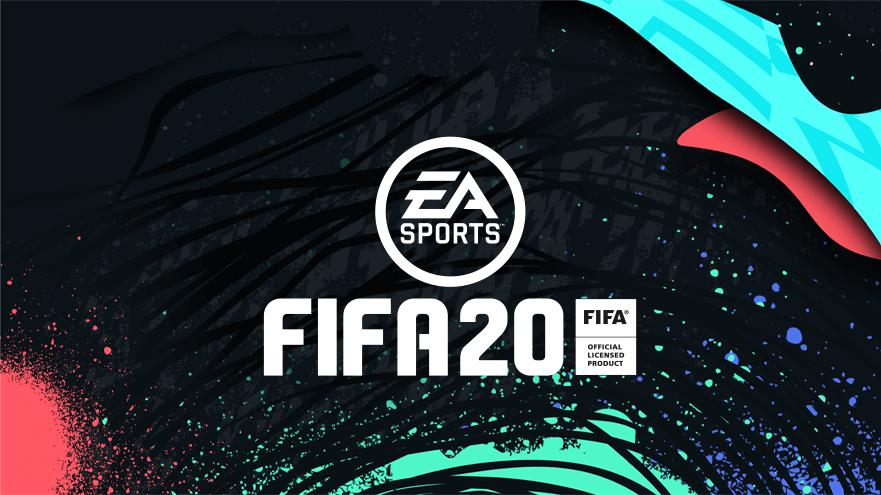

###        In this project we explore the data through the domain of unsupervised learning performing principal component analysis and clustering analysis. One goal of this project is to categorize the similar players using their traits and their different skills in the field. In a high-dimensional data, it is often difficult to develop an intuition of the features and our goal in this project is to reduce the dimensionality of the dataset so that we can visualize the clusters in our dataset. We start with 104 features and bring down the dimensionality to 28 features by selecting key features using our domain knowledge, and then further to just two principal components using PCA. We visualize the data using these principal components, perform clustering analysis and visualize the clusters and develop an inference for the same.

## Businesscase:- Based on the given features we need to categorize the similar players using their traits and their different skills in the field.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi
from scipy import stats
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("players_20.csv")
pd.set_option('display.max_columns',None)
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [3]:
for col in data.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

In [4]:
data.shape

(18278, 104)

### The Data has 18278 rows and 104 features



## **Basic understanding of features-- Domain Analysis**


* **sofifaid** - ID of the player.
* **player_url** - Total details of the players are available here.
* **short_name** - short Name of the player.
* **long_name** - Full name of the player.
* **Age** - Age of the player.
* **dob** - Date of birth of the player.
* **height_cm** - Height of the player in centimeters.
* **weight_kg** - Weight in kilograms.
* **nationality** - To which country the player belong to.
* **club** - To which club the player is playing to.
* **Overall** - General performance of the player rated between 1-99.
* **Potential** - Maximum Overall rating expected to be reached by a player rated between 1-99.
* **value_eur** - The amount with which the player has bought in Euros.
* **wage_eur** - wage of the player per week in Euros.
* **player_positions** - Position of the players on the pitch which determines their roles and responsibilities in the team    
* **PreferredFoot** - With which foot player likes to play most Right or Left.
* **international_reputation** - Reputation of the player internationally rated between 1 - 5.
* **WeakFoot** -  Represents how well a player uses his weak foot (e.g. left for righties) rated between 1 - 5.
* **skill_moves** - Skill moves by a player rated between 1 - 5.
* **WorkRate** - Degree of the effort the player puts in terms of attack and defense rated as low, medium and high. 
   This feature is divided into two new features as AttackWorkRate and DefenseWorkRate. Besides, label encoder is applied as 0    for low, 0.5 for medium and 1 for high.
* **body_type** - Body type of the player.
* **real_face** - wether real face of the player is displayed or not, yes or No.
* **relese_clause_eur** - price value of the player while releasing in Euros.
* **player_tags** - player tags are the positions in which they are likely to play.
* **team_position** - Position in which the player plays.
* **team_jersey_number** - Number on the players jersey.
* **loaned_from** - from which team the player is loaned.
* **joined** - Date when the player is joined in the team.
* **contract_valid_until**- End date of the player in team.
* **pace** - Running speed of the player while playing, rated between 1-99
* **physic** - Personality of the player, rated between 1-99.
* **player_traits** - Unique skills of the player.

* **attacking_crossing** - Crossing skill of the player rated between 1-99. Cross is a long-range pass from wings to center.
* **attacking_finishing** - Finishing skill of the player rated between 1-99. Finishing in football refers to finish an attack     by scoring a goal.
* **attacking_heading_accuracy** - Player’s accuracy to pass or shoot by using his head rated between 1-99.
* **attacking_short_passing** - Player’s accuracy for short passes rated between 1-99.
* **attacking_volleys** - Player’s ability to perform volleys rated between 1-99.

* **skill_dribbling** - Dribbling skill of the player rated between 1-99. Dribbling is carrying the ball without losing while  
     moving in one particular direction.
* **skill_curve** - Player’s ability to curve the ball while passing or shooting rated between 1-99.
* **skill_fk_accuracy** - Player’s accuracy to score free kick goals rated between 1-99.
* **skill_long_passing** - Player’s accuracy for long passes rated between 1-99.
* **skill_ball_control** - Player’s ability to control the ball rated between 1-99.

* **movement_acceleration** - Shows how fast a player can reach his maximum sprint speed rated between 1-99.
* **movement_sprint_speed** - Speed rate of the player rated between 1-99.
* **movement_agility** - Gracefulness and quickness of the player while controlling the ball rated between 1-99.
* **movement_reactions** - Acting speed of the player to what happens in his environment rated between 1-99.
* **movement_balance** - Player’s ability to remain steady while running, carrying and controlling the ball rated between 1-99.

* **power_shot_power** - Player’s strength level of shooting the ball rated between 1-99.
* **power_jumping** - Player’s jumping skill rated between 1-99.
* **power_stamina** - Player’s ability to sustain his stamina level during the match rated between 1-99. Players with lower   
    stamina get tired fast.
* **power_strength** - Physical strength of the player rated between 1-99.
* **power_long_shots** - Player’s accuracy of shoots from long distances rated between 1-99.

* **mentality_aggression** - Aggression level of the player while pushing, pulling and tackling rated between 1-99.
* **mentality_interceptions** - Player’s ability to intercept the ball while opposite team’s players are passing rated between 
    1-99.
* **mentality_positioning** - Player’s ability to place himself in the right position to receive the ball or score goals rated      between 1- 99.
* **mentality_vision** - Player’s mental awareness about the other players in the team for passing rated between 1-99.
* **mentality_penalties** - Player’s accuracy to score goals from penalty rated between 1-99.
* **mentality_composure** - Player’s ability to control his calmness and frustration during the match rated between 1-99.

* **defending_marking** -Player’s ability to apply strategies to prevent opposing team from taking the ball rated between 1-99.
* **defending_standing_tackle** - Player’s ability to perform tackle (take the ball from the opposite player) while standing  
     rated between 1-99.
* **defending_sliding_tackle** - Player’s ability to perform tackle by sliding rated between 1-99. It is a defensive skill.

* **Abilities of the goal keeper while playing the game** 
  * goalkeeping_diving
  * goalkeeping_handling
  * goalkeeping_kicking
  * goalkeeping_positioning
  * goalkeeping_reflexes
* **player_positions** - Position of the players on the pitch which determines their roles and responsibilities in the team. 
     Forward positions in the FIFA 20 can be grouped as striker (ST: center striker, RS: right striker, LS: left striker), 
        forward (CF: center forward, RF: right forward, LF: left forward) and 
        winger (RW: right winger, LW: left winger).   
  * **Positions in fifa** 
    * **LS**: Positional skill. Player’s general ability while playing in Left Striker position rated between 1-99.
    * **ST**: Positional skill. Player’s general ability while playing in Center striker position rated between 1-99.
    * **RS**: Positional skill. Player’s general ability while playing in in Right Striker position rated between 1-99.
    * **LW**: Positional skill. Player’s general ability while playing in Left Wing position rated between 1-99.
    * **LF**: Positional skill. Player’s general ability while playing in Left Forward position rated between 1-99.
    * **CF**: Positional skill. Player’s general ability while playing in Center Forward position rated between 1-99.
    * **RF**: Positional skill. Player’s general ability while playing in Right Forward position rated between 1-99.
    * **RW**: Positional skill. Player’s general ability while playing in Right Wing position rated between 1-99.    

## Data Preprocessing

In [5]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [7]:
# Dropping the unnecessary columns which are not useful for clustering the similar players depending on their skills.
data = data.drop(['sofifa_id','player_url','long_name','dob','body_type','nation_jersey_number','team_jersey_number', 'real_face','player_tags','loaned_from','joined','contract_valid_until','player_positions','nation_position', 'player_traits'], axis=1)


In [8]:
# Dropping some duplicate columns
data = data.drop(['shooting','passing','dribbling','defending','gk_diving', 'gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning',], axis=1)

In [9]:
# Renaming short_name and team_position columns
data = data.rename({'short_name':'name'}, axis=1)
data = data.rename({'team_position' : 'position'}, axis=1)

In [10]:
data.head()

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,195800000.0,RW,87.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,96500000.0,LW,90.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,High/Medium,195200000.0,CAM,91.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,164700000.0,GK,NaN,NaN,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,High/Medium,184500000.0,LW,91.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   nationality                 18278 non-null  object 
 5   club                        18278 non-null  object 
 6   overall                     18278 non-null  int64  
 7   potential                   18278 non-null  int64  
 8   value_eur                   18278 non-null  int64  
 9   wage_eur                    18278 non-null  int64  
 10  preferred_foot              18278 non-null  object 
 11  international_reputation    18278 non-null  int64  
 12  weak_foot                   18278 non-null  int64  
 13  skill_moves                 182

In [12]:
data.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,16242.000000,16242.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,67.700899,64.876678,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,11.297656,9.760162,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,24.000000,27.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,61.000000,59.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.000000,55.000000,56.000000,56.000000,48.000000,58.000000,56.000000,58.000000,32.000000,44.000000,25.000000,39.000000,44.000000,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,1.200000e+06,69.000000,66.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,66.000000,51.000000,58.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,3.000000,3.700000e+06,75.000000,72.000000,64.000000,62.000000,64.000000,68.000000,56.000000,68.000000,62.000000,56.0000


## Checking for NULL values

In [13]:
pd.set_option('display.max_rows', 80)
data.isnull().sum()

name                             0
age                              0
height_cm                        0
weight_kg                        0
nationality                      0
club                             0
overall                          0
potential                        0
value_eur                        0
wage_eur                         0
preferred_foot                   0
international_reputation         0
weak_foot                        0
skill_moves                      0
work_rate                        0
release_clause_eur            1298
position                       240
pace                          2036
physic                        2036
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_long_passing               0
skill_ball_control  

### Replacing Null values with mean

In [14]:
# Numerical columns
data['release_clause_eur'] = data['release_clause_eur'].fillna(data['release_clause_eur'].mean())
data['pace'] = data['pace'].fillna(data['pace'].mean())
data['physic'] = data['physic'].fillna(data['physic'].mean())


In [15]:
# categorical column
data.position.value_counts()

SUB    7820
RES    2958
GK      662
RCB     660
LCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: position, dtype: int64

In [16]:
data['position'] = data['position'].replace(np.NaN, 'unknown')

In [17]:
#position Columns

#Function to convert position skill rating at each position.
def PositionConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    else:
        return val

position_columns = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm',
    'cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

for col in position_columns:
    data[col] = data[col].apply(PositionConverter)
    data[col].fillna(0.0, inplace = True)


In [18]:
data.isnull().sum()

name                          0
age                           0
height_cm                     0
weight_kg                     0
nationality                   0
club                          0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
preferred_foot                0
international_reputation      0
weak_foot                     0
skill_moves                   0
work_rate                     0
release_clause_eur            0
position                      0
pace                          0
physic                        0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement

### Now our data doesn't have any NULL values

In [19]:
data.head()

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,195800000.0,RW,87.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,96500000.0,LW,90.000000,78.000000,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,High/Medium,195200000.0,CAM,91.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,87.0,87.0,87.0,93.0,92.0,92.0,92.0,93.0,93.0,93.0,93.0,92.0,85.0,85.0,85.0,92.0,69.0,64.0,64.0,64.0,69.0,64.0,49.0,49.0,49.0,64.0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,164700000.0,GK,67.700899,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,High/Medium,184500000.0,LW,91.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,86.0,86.0,86.0,92.0,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0


## * Converting categorical features to Numerical

### Workrate

In [20]:
data.work_rate.value_counts()

Medium/Medium    9875
High/Medium      3216
Medium/High      1718
High/High         986
Medium/Low        886
High/Low          684
Low/Medium        461
Low/High          417
Low/Low            35
Name: work_rate, dtype: int64

In [21]:
#Split the Work Rate Column 
data['work_rate'] = data['work_rate'].str.split("/").str[0] 


In [22]:
data.work_rate.value_counts()

Medium    12479
High       4886
Low         913
Name: work_rate, dtype: int64

In [23]:
data['work_rate'] = data['work_rate'].replace({'High':2 , 'Medium':1 , 'Low':0 })

In [24]:
data.work_rate.value_counts()

1    12479
2     4886
0      913
Name: work_rate, dtype: int64

In [25]:
data.head()

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,1,195800000.0,RW,87.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,2,96500000.0,LW,90.000000,78.000000,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,2,195200000.0,CAM,91.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,87.0,87.0,87.0,93.0,92.0,92.0,92.0,93.0,93.0,93.0,93.0,92.0,85.0,85.0,85.0,92.0,69.0,64.0,64.0,64.0,69.0,64.0,49.0,49.0,49.0,64.0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,1,164700000.0,GK,67.700899,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,2,184500000.0,LW,91.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,86.0,86.0,86.0,92.0,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   nationality                 18278 non-null  object 
 5   club                        18278 non-null  object 
 6   overall                     18278 non-null  int64  
 7   potential                   18278 non-null  int64  
 8   value_eur                   18278 non-null  int64  
 9   wage_eur                    18278 non-null  int64  
 10  preferred_foot              18278 non-null  object 
 11  international_reputation    18278 non-null  int64  
 12  weak_foot                   18278 non-null  int64  
 13  skill_moves                 182

In [27]:
data.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,1.217365,4.740717e+06,67.700899,64.876678,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924,53.192034,53.192034,53.192034,54.298501,54.023416,54.023416,54.023416,54.298501,54.266824,54.266824,54.266824,54.902451,53.549240,53.549240,53.549240,54.902451,52.797078,52.208064,52.208064,52.208064,52.797078,52.153791,51.090382,51.090382,51.090382,52.153791
std,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,0.519648,1.063114e+07,10.649820,9.200490,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125,20.733829,20.733829,20.733829,21.363255,21.267185,21.267185,21.267185,21.363255,21.305434,21.305434,21.305434,21.306409,20.707756,20.707756,20.707756,21.306409,20.550042,20.827602,20.827602,20.827602,20.550042,20.569076,21.232318,21.232318,21.232318,20.569076
min,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,1.300000e+04,24.000000,27.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

## Exploratory Data Analysis

## Univariate Analysis

In [26]:
import sweetviz as sv
my_report= sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insights from the Univariate analysis

* The ideal range of the players' age to have high market value is between 20-30.
* Average height of the players are 181cms.
* England, Germany, spain, France, Argentina and Brazil are the top 5 countries producing world class football players.
* Most of the players preferrd foot is Right.

## Bivariate Analysis

### ** Count of Players from Top 10 countries**

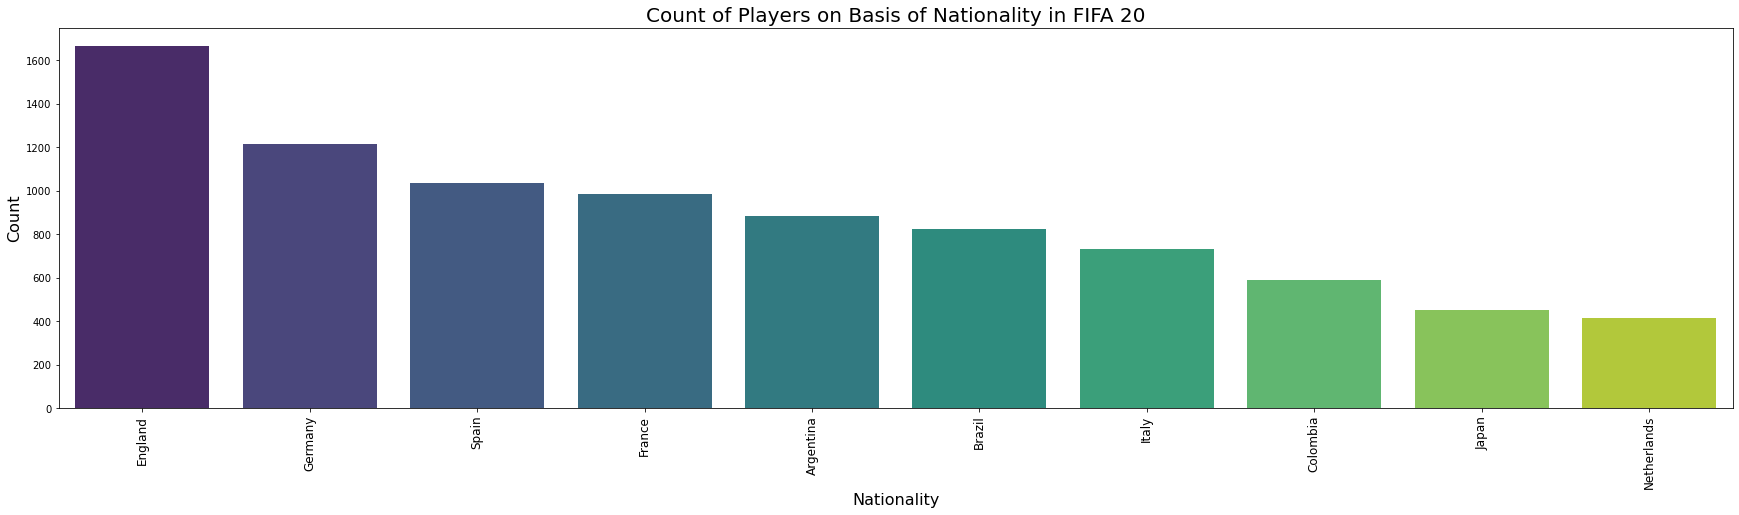

In [28]:
plt.figure(figsize= (30, 7))
ax = sns.countplot(x='nationality', data= data, palette='viridis', order= data.nationality.value_counts().iloc[:10].index)
ax.set_title(label='Count of Players on Basis of Nationality in FIFA 20', fontsize=20)
ax.set_xlabel(xlabel='Nationality', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.show()

### ** Extracting Top rated players**

In [29]:
data_top_rated = data.sort_values(by=["overall"], ascending=False)
data_top_rated.head(10)

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,1,195800000.0,RW,87.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,2,96500000.0,LW,90.000000,78.000000,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,2,195200000.0,CAM,91.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,87.0,87.0,87.0,93.0,92.0,92.0,92.0,93.0,93.0,93.0,93.0,92.0,85.0,85.0,85.0,92.0,69.0,64.0,64.0,64.0,69.0,64.0,49.0,49.0,49.0,64.0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,1,164700000.0,GK,67.700899,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,2,184500000.0,LW,91.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,86.0,86.0,86.0,92.0,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,Right,4,5,4,2,166500000.0,RCM,76.000000,78.000000,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,Right,3,4,1,1,143400000.0,GK,67.700899,64.876678,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,V. van Dijk,27,193,92,Netherlands,Liverpool,90,91,78000000,200000,Right,3,3,2,1,150200000.0,LCB,77.000000,86.000000,53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,13,10,13,11,11,72.0,72.0,72.0,70.0,72.0,72.0,72.0,70.0,72.0,72.0,72.0,72.0,77.0,77.0,77.0,72.0,82.0,86.0,86.0,86.0,82.0,84.0,90.0,90.0,90.0,84.0
8,L. Modrić,33,172,66,Croatia,Real Madrid,90,90,45000000,340000,Right,4,4,4,2,92300000.0,RCM,74.000000,66.000000,86,72,55,92,76,87,85,78,88,92,77,71,92,89,93,79,68,85,58,82,62,82,79,91,82,92,68,76,71,13,9,7,14,9,80.0,80.0,80.0,87.0,86.0,86.0,86.0,87.0,89.0,89.0,89.0,88.0,90.0,90.0,90.0,88.0,84.0,84.0,84.0,84.0,84

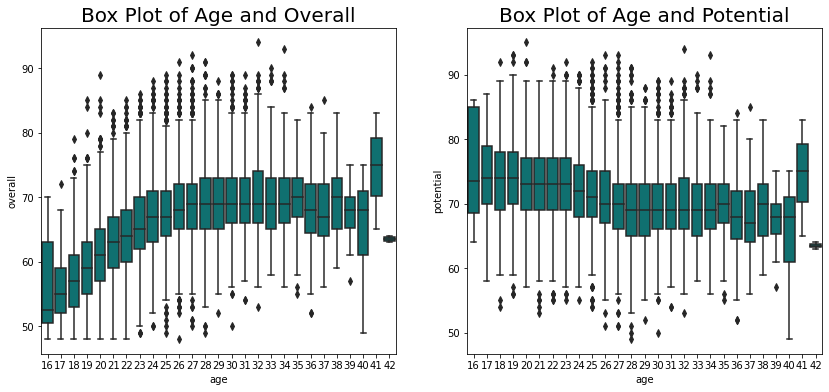

In [30]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(data=data, x="age", y="overall",palette=["teal"])
plt.title("Box Plot of Age and Overall",fontsize=20)
plt.subplot(1,2,2)
sns.boxplot(data=data, x="age", y="potential",palette=["teal"])
plt.title("Box Plot of Age and Potential",fontsize=20)
plt.show()

### ** Club wise analysis**

In [31]:
data.club.value_counts()

FC Barcelona                  33
Real Valladolid CF            33
VfL Wolfsburg                 33
Crystal Palace                33
Eintracht Frankfurt           33
                              ..
US Orléans Loiret Football     1
Canada                         1
Mexico                         1
Turkey                         1
Śląsk Wrocław                  1
Name: club, Length: 698, dtype: int64

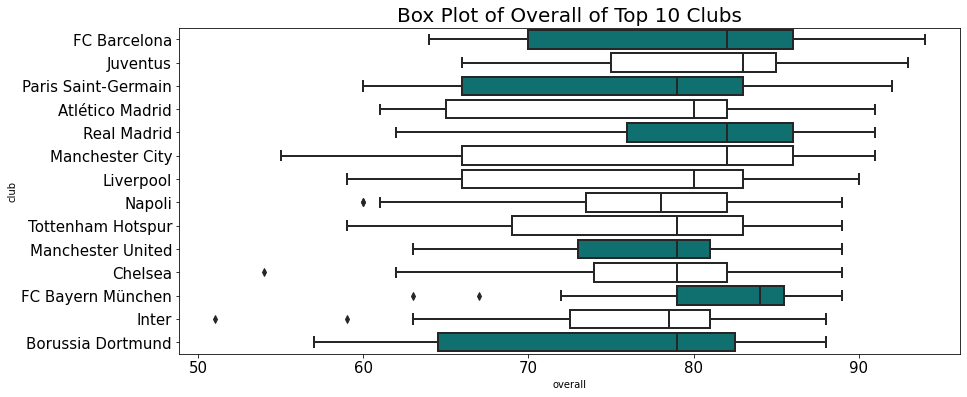

In [32]:
club = data.loc[(data["club"]=="Real Madrid")|
      (data["club"]=="Manchester City")|
      (data["club"]=="FC Barcelona")|
      (data["club"]=="Tottenham Hotspur")|
      (data["club"]=="Paris Saint-Germain")|
      (data["club"]=="Liverpool")|
      (data["club"]=="Juventus")|
      (data["club"]=="Napoli")|
      (data["club"]=="FC Bayern München")|
      (data["club"]=="Manchester United")|
      (data["club"]=="Inter")|
      (data["club"]=="Borussia Dortmund")|
      (data["club"]=="Atlético Madrid")|
      (data["club"]=="Chelsea")|
      (data["club"]=="Arsenal ")]

plt.figure(figsize=(14,6))
sns.boxplot(data=club,y="club",x="overall",
            palette=["teal","white","teal","white","teal"]+["white"]*4,linewidth=2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Box Plot of Overall of Top 10 Clubs",fontsize=20)
plt.show()

### ** Overall Ratings of players Vs Value in Euros**

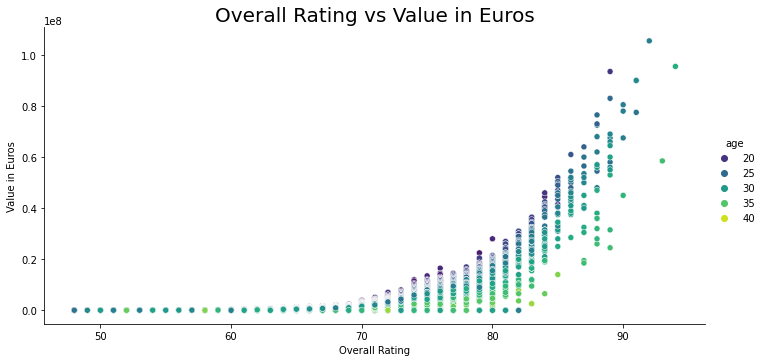

In [33]:
sns.relplot(x='overall', y='value_eur', hue='age', palette='viridis', sizes=(15, 200), aspect=2, data= data)
plt.title('Overall Rating vs Value in Euros', fontsize = 20)
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euros')
plt.show()

### ** Overall potential of players Vs Wage of players in Euros**

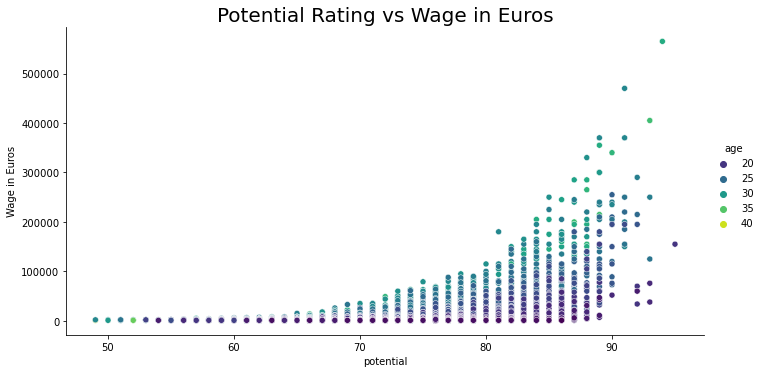

In [34]:
sns.relplot(data = data, x='potential', y='wage_eur', hue='age', palette='viridis', sizes=(15, 200), aspect=2)
plt.title('Potential Rating vs Wage in Euros', fontsize = 20)
plt.xlabel('potential')
plt.ylabel('Wage in Euros')
plt.show()

### ** Analysing the foot preferences of players**

In [35]:
data.preferred_foot.value_counts()

Right    13960
Left      4318
Name: preferred_foot, dtype: int64

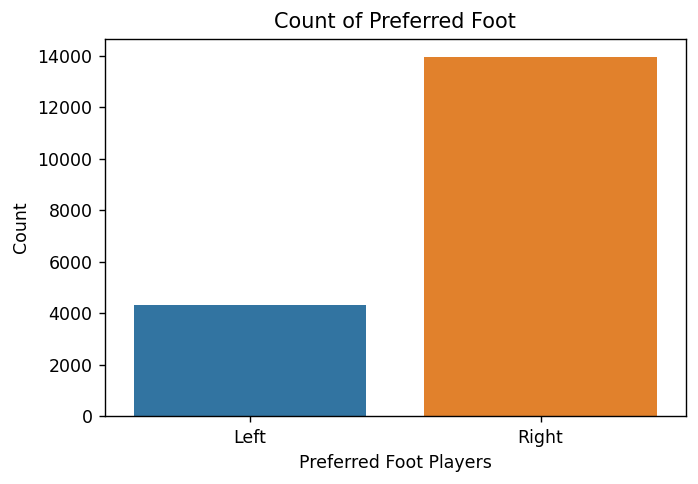

In [36]:
plt.figure(dpi=125)
sns.countplot(x='preferred_foot', data= data)
plt.xlabel('Preferred Foot Players')
plt.ylabel('Count')
plt.title('Count of Preferred Foot')
plt.show()

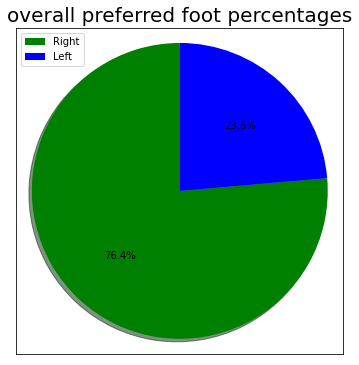

In [37]:
labels  = data["preferred_foot"].value_counts().index
sizes   = data["preferred_foot"].value_counts().values
plt.figure(figsize=(10,6))
plt.pie(x=sizes, shadow=True,autopct='%1.1f%%', startangle=90, frame=True,colors=["green","blue"])
plt.legend(labels)
plt.title("overall preferred foot percentages",fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()

### ** Top 100 players International reputation**

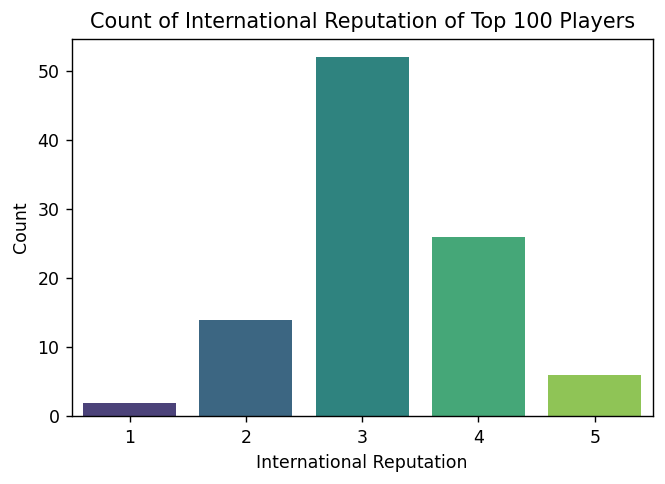

In [38]:
plt.figure(dpi=125)
sns.countplot('international_reputation', data= data.head(100), palette='viridis')
plt.xlabel('International Reputation')
plt.ylabel('Count')
plt.title('Count of International Reputation of Top 100 Players')
plt.show()

### ** Analysing the age of players**

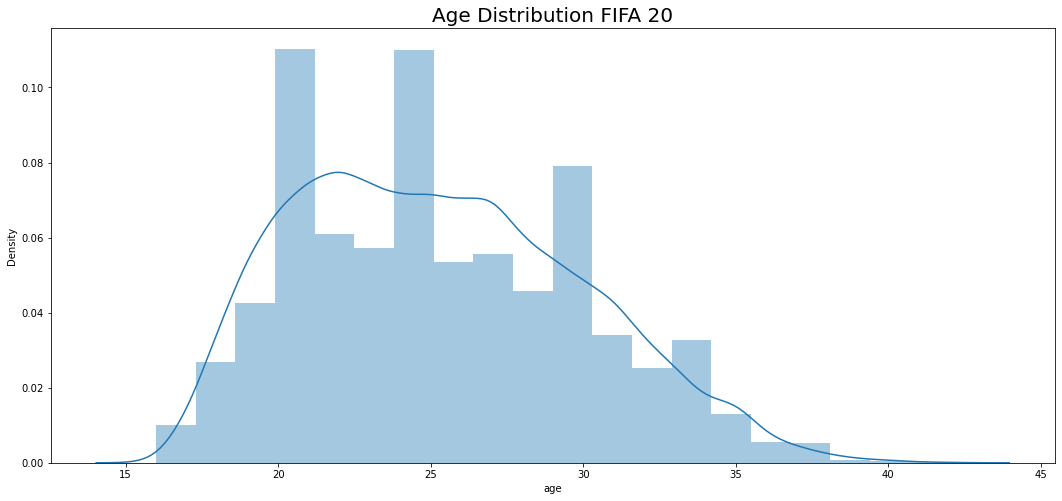

In [39]:
plt.figure(figsize=(18,8))
plt.title('Age Distribution FIFA 20', fontsize=20)
sns.distplot(a=data['age'], kde=True, bins=20);

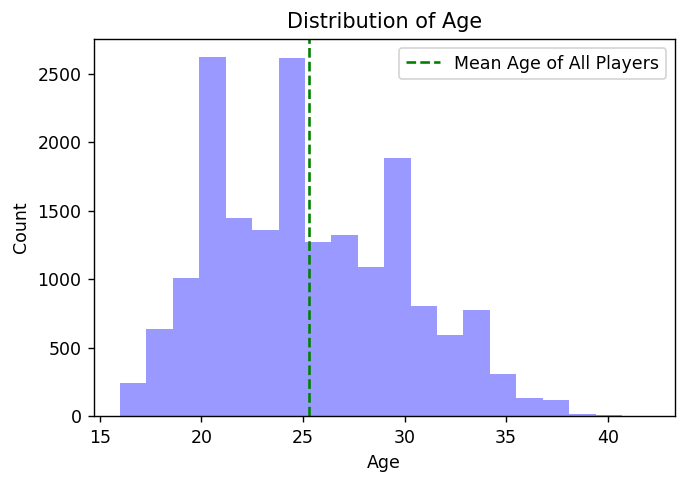

In [40]:
plt.figure(dpi=125)
sns.distplot(a= data['age'], kde=False, bins=20, color='blue')
plt.axvline(x=np.mean(data['age']), c='green', ls='--', label='Mean Age of All Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

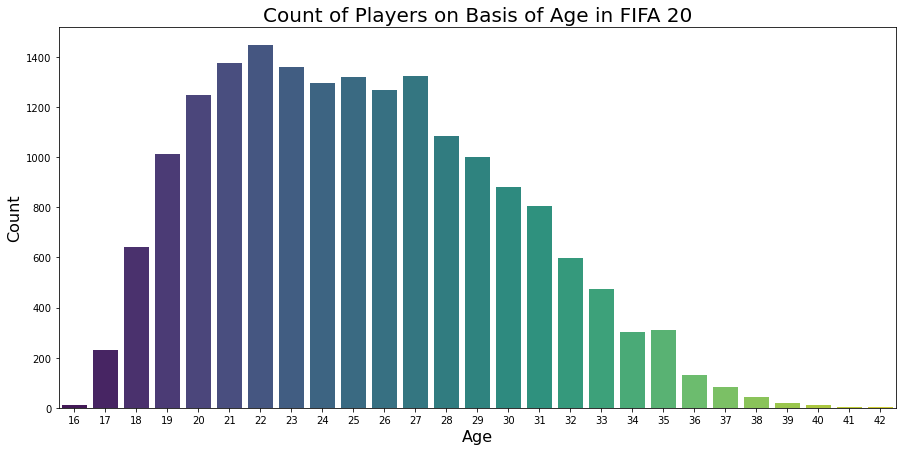

In [41]:
plt.figure(figsize= (15,7))
ax = sns.countplot(x='age', data=data, palette='viridis')
ax.set_title(label='Count of Players on Basis of Age in FIFA 20', fontsize=20)
ax.set_xlabel(xlabel='Age', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.show()

## ** Analyzing Top 20 players**

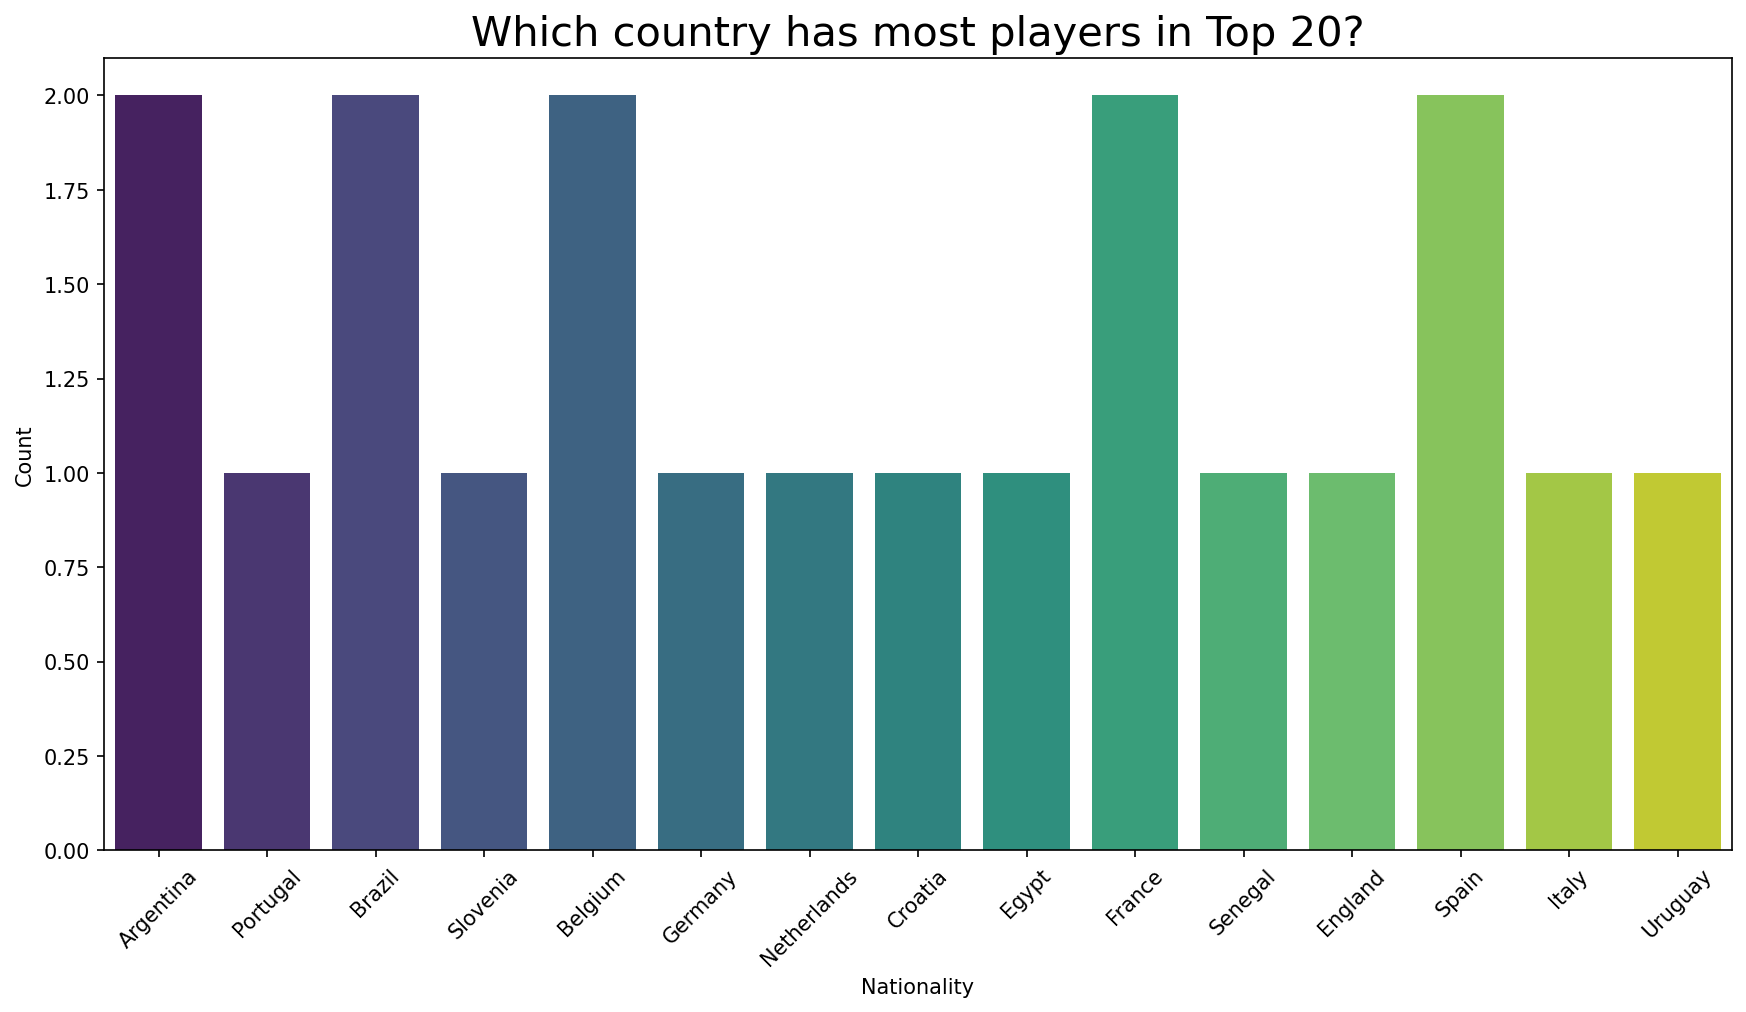

In [42]:
plt.figure(figsize=(14,7), dpi=150)
sns.countplot(x='nationality', data=data.head(20), palette='viridis')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which country has most players in Top 20?', fontsize = 20)
plt.show()

### ** Club with Maximum players in Top 20**

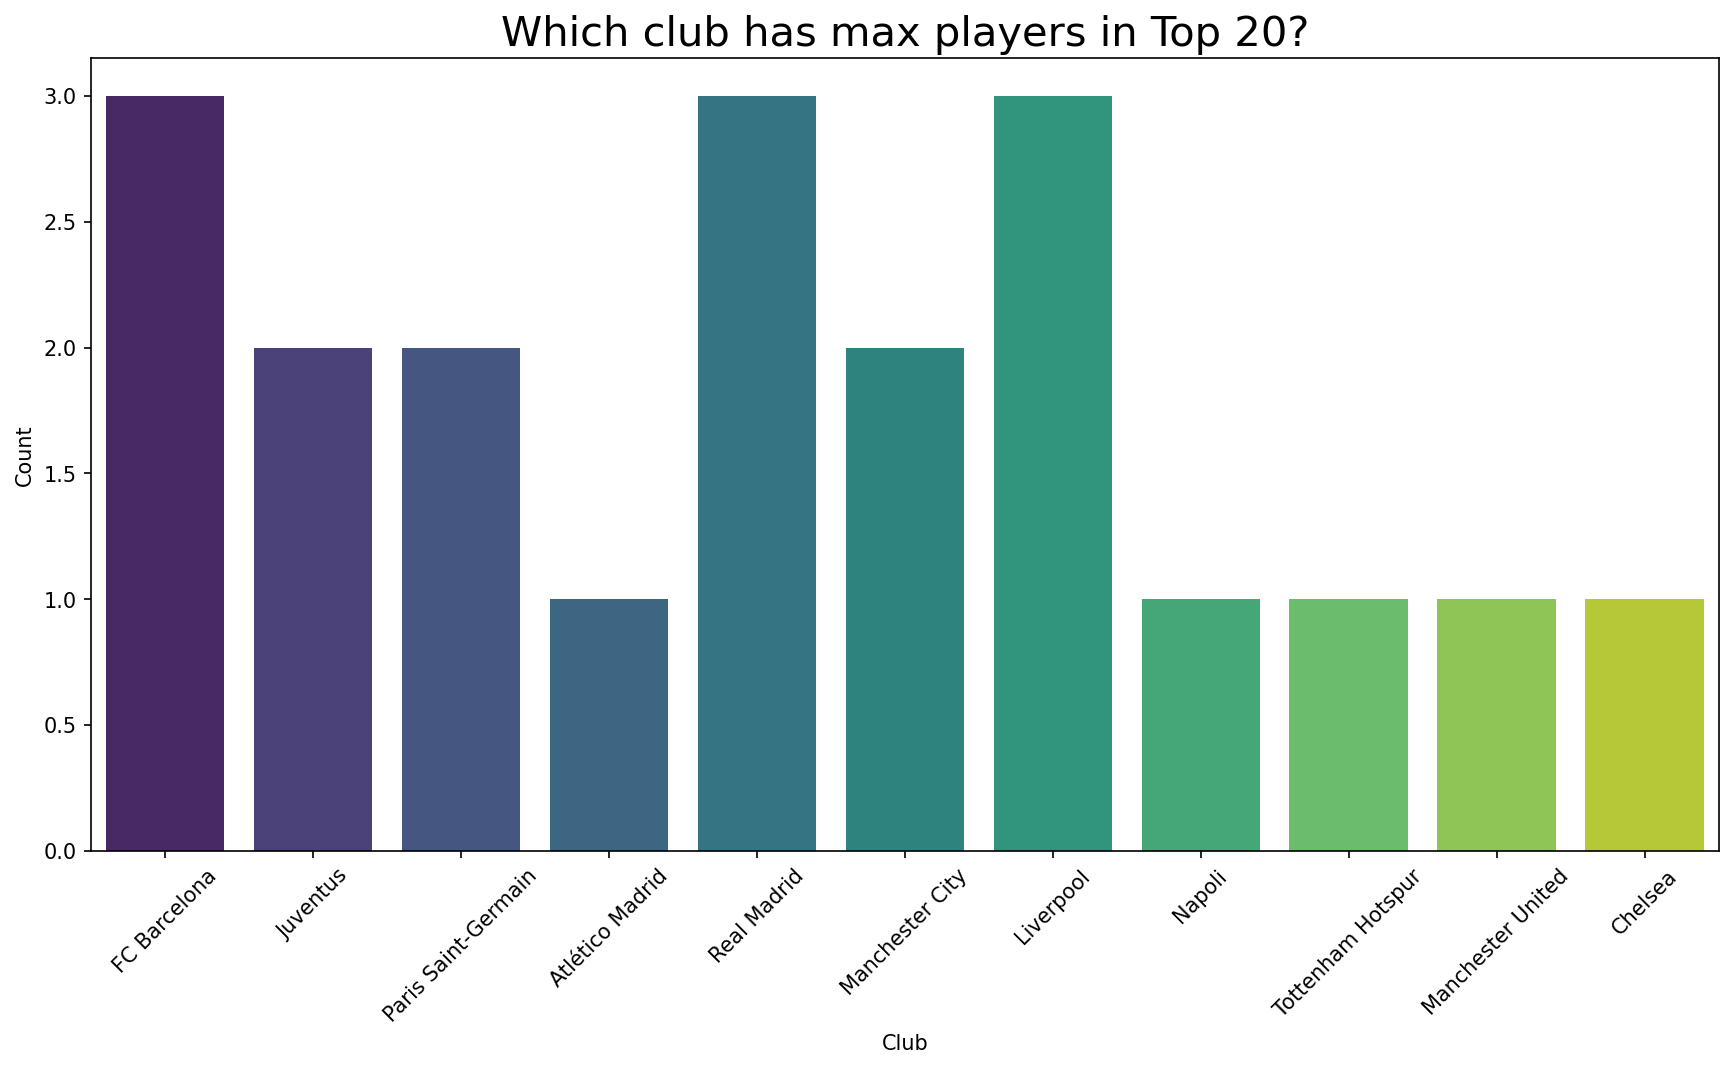

In [43]:
plt.figure(figsize=(14,7), dpi=150)
sns.countplot('club', data=data.head(20), palette='viridis')
plt.xlabel('Club')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which club has max players in Top 20?', fontsize = 20)
plt.show()

### ** High Valued player in Fifa20**

In [44]:
data_high_value = data.sort_values(by=['value_eur'], ascending=False)
data_high_value.head(10)

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,2,195200000.0,CAM,91.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,87.0,87.0,87.0,93.0,92.0,92.0,92.0,93.0,93.0,93.0,93.0,92.0,85.0,85.0,85.0,92.0,69.0,64.0,64.0,64.0,69.0,64.0,49.0,49.0,49.0,64.0
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,1,195800000.0,RW,87.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0
10,K. Mbappé,20,178,73,France,Paris Saint-Germain,89,95,93500000,155000,Right,3,4,5,2,191700000.0,RW,96.000000,75.000000,78,89,77,82,79,91,79,63,70,90,96,96,92,89,83,83,76,84,76,79,62,38,89,80,70,84,34,34,32,13,5,7,11,6,89.0,89.0,89.0,90.0,90.0,90.0,90.0,90.0,89.0,89.0,89.0,89.0,81.0,81.0,81.0,89.0,69.0,65.0,65.0,65.0,69.0,66.0,57.0,57.0,57.0,66.0
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,Right,4,5,4,2,166500000.0,RCM,76.000000,78.000000,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,2,184500000.0,LW,91.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,86.0,86.0,86.0,92.0,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0
12,H. Kane,25,188,89,England,Tottenham Hotspur,89,91,83000000,220000,Right,3,4,3,2,159800000.0,ST,70.000000,83.000000,75,94,86,81,85,80,78,68,83,84,68,72,71,91,73,90,79,87,84,86,78,35,93,81,90,91,56,36,38,8,10,11,14,11,89.0,89.0,89.0,85.0,87.0,87.0,87.0,85.0,86.0,86.0,86.0,85.0,82.0,82.0,82.0,85.0,68.0,69.0,69.0,69.0,68.0,65.0,63.0,63.0,63.0,65.0
9,M. Salah,27,175,71,Egypt,Liverpool,90,90,80500000,240000,Left,3,3,4,2,148900000.0,RW,93.000000,74.000000,79,90,59,84,79,89,83,69,75,89,94,92,91,92,88,80,69,85,73,84,63,55,92,84,77,91,38,43,41,14,14,9,11,14,87.0,87.0,87.0,91.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,90.0,84.0,84.0,84.0,90.0,73.0,70.0,70.0,70.0,73.0,69.0,60.0,60.0,60.0,69.0
7,V. van Dijk,27,193,92,Netherlands,Liverpool,90,91,78000000,200000,Right,3,3,2,1,150200000.0,LCB,77.000000,86.000000,53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,13,10,13,11,11,72.0,72.0,72.0,70.0,72.0,72.0,72.0,70.0,72.0,72.0,72.0,72.0,77.0,77.0,77.0,72.0,82.0,86.0,86.0,86.0,82.0,84.0,90.0,90.0,90.0,84.0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,1,164700000.0,GK,67.700899,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

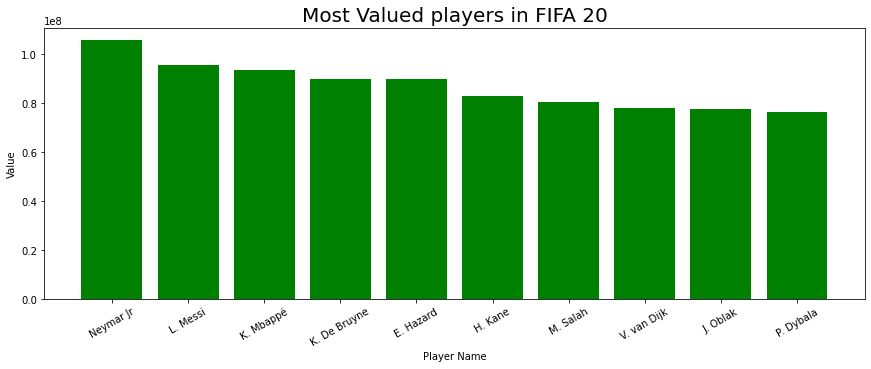

In [45]:
plt.figure(figsize = (50, 5))
plt.subplot(131)
plt.bar(data_high_value["name"].head(10), data_high_value["value_eur"].head(10), color='green')
plt.tick_params(axis="x", rotation=30)
plt.ylabel("Value")
plt.xlabel("Player Name")
plt.title("Most Valued players in FIFA 20", fontsize=20)
plt.show()

###  ** Top most Position of players**

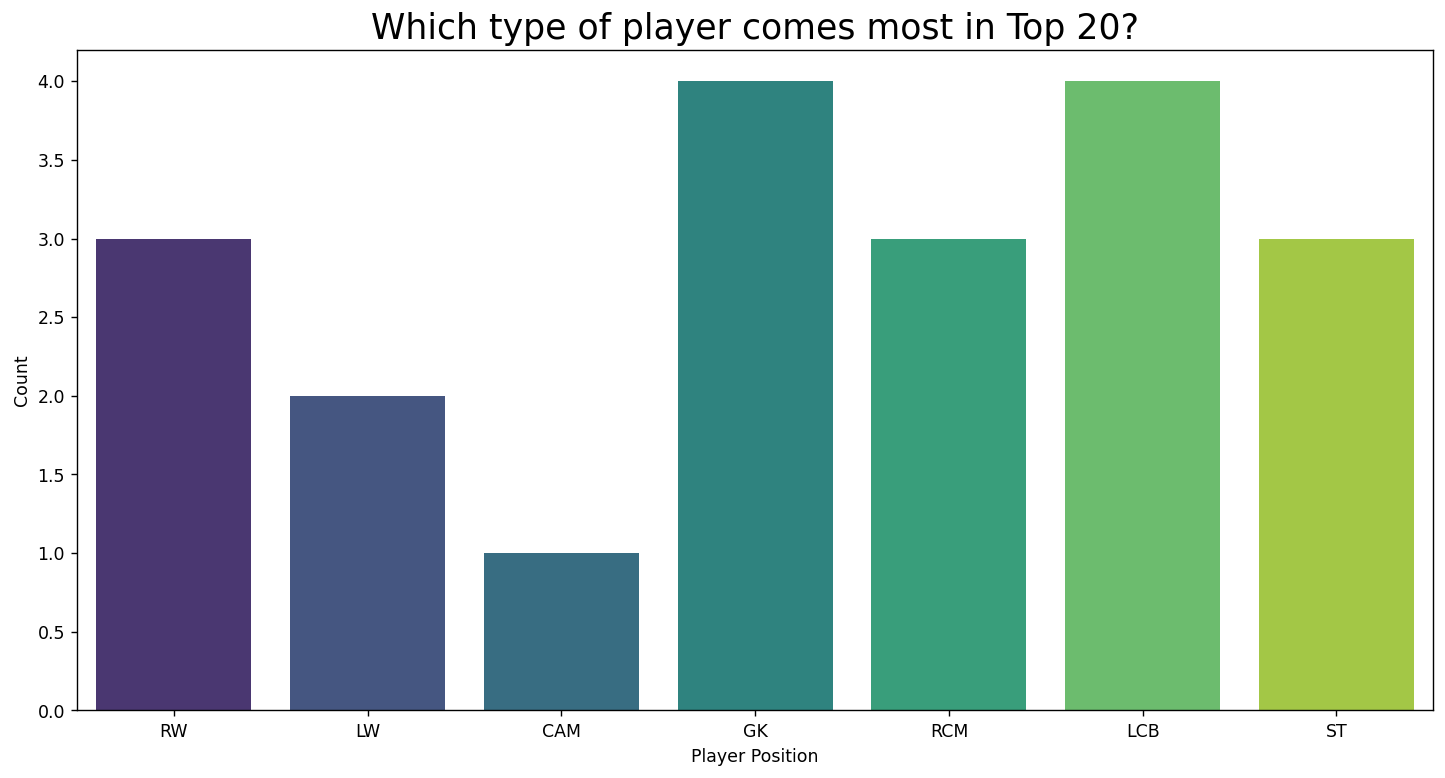

In [46]:
plt.figure(figsize=(14,7),dpi=125)
sns.countplot('position', data=data.head(20), palette='viridis')
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.title('Which type of player comes most in Top 20?', fontsize = 20)
plt.show()

## ** Analysing Top skills of players**

In [47]:
top_speed = data.sort_values(by=['movement_sprint_speed'], ascending=False)
free_kick = data.sort_values(by=['skill_fk_accuracy'], ascending=False)
skill_moves = data.sort_values(by=['skill_moves'], ascending=False)
finishing = data.sort_values(by=['attacking_finishing'], ascending=False)

In [48]:
top_speed = top_speed.head(20)
free_kick = free_kick.head(20)
skill_moves = skill_moves.head(20)
finishing = finishing.head(20)

In [49]:
top_speed.head()

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
10,K. Mbappé,20,178,73,France,Paris Saint-Germain,89,95,93500000,155000,Right,3,4,5,2,191700000.0,RW,96.0,75.0,78,89,77,82,79,91,79,63,70,90,96,96,92,89,83,83,76,84,76,79,62,38,89,80,70,84,34,34,32,13,5,7,11,6,89.0,89.0,89.0,90.0,90.0,90.0,90.0,90.0,89.0,89.0,89.0,89.0,81.0,81.0,81.0,89.0,69.0,65.0,65.0,65.0,69.0,66.0,57.0,57.0,57.0,66.0
2167,Adama Traoré,23,178,72,Spain,Wolverhampton Wanderers,74,82,8500000,56000,Right,1,2,4,2,17900000.0,SUB,96.0,75.0,71,58,40,64,52,89,65,42,52,80,97,96,84,62,87,74,73,73,81,55,62,29,60,57,47,70,25,36,33,13,9,11,12,7,69.0,69.0,69.0,75.0,72.0,72.0,72.0,75.0,71.0,71.0,71.0,75.0,64.0,64.0,64.0,75.0,60.0,53.0,53.0,53.0,60.0,56.0,48.0,48.0,48.0,56.0
9065,A. Chalá,23,178,71,Ecuador,Deportivo Toluca,66,73,800000,5000,Left,1,3,2,2,1500000.0,LWB,95.0,65.0,59,38,56,54,36,54,49,31,51,55,93,96,70,58,66,61,67,75,59,42,68,59,66,58,54,60,67,65,62,6,13,10,8,7,59.0,59.0,59.0,61.0,60.0,60.0,60.0,61.0,59.0,59.0,59.0,63.0,58.0,58.0,58.0,63.0,66.0,61.0,61.0,61.0,66.0,67.0,64.0,64.0,64.0,67.0
55,L. Sané,23,183,75,Germany,Manchester City,86,92,61000000,195000,Left,2,3,4,2,125100000.0,SUB,95.0,70.0,83,81,72,80,85,88,83,82,64,85,93,96,86,81,80,87,64,78,70,78,61,34,84,82,71,80,36,32,35,8,12,9,9,14,84.0,84.0,84.0,86.0,86.0,86.0,86.0,86.0,85.0,85.0,85.0,85.0,76.0,76.0,76.0,85.0,67.0,61.0,61.0,61.0,67.0,63.0,54.0,54.0,54.0,63.0
1083,I. Bebou,25,183,72,Togo,TSG 1899 Hoffenheim,77,80,11000000,36000,Right,1,3,4,1,19500000.0,RS,93.0,64.0,68,74,55,73,63,83,63,46,53,78,91,95,83,73,75,66,69,78,64,64,43,31,74,68,67,66,26,35,33,10,11,12,11,11,74.0,74.0,74.0,79.0,77.0,77.0,77.0,79.0,76.0,76.0,76.0,78.0,69.0,69.0,69.0,78.0,61.0,55.0,55.0,55.0,61.0,58.0,48.0,48.0,48.0,58.0


Text(0.5, 1.0, 'Fastest Players')

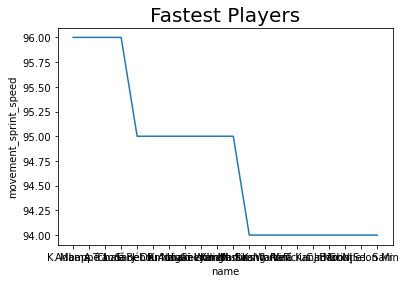

In [50]:
sns.lineplot(top_speed['name'], top_speed['movement_sprint_speed']).set_title("Fastest Players", fontsize=20)

In [51]:
free_kick.head()

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,1,1.958000e+08,RW,87.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0
393,S. Giovinco,32,163,61,Italy,Al Hilal,81,81,14000000,56000,Right,2,4,4,2,2.380000e+07,RS,81.0,56.0,72,78,34,80,75,86,90,92,76,86,84,78,94,83,93,80,34,75,42,81,75,26,83,78,73,82,23,29,28,6,3,6,3,3,76.0,76.0,76.0,83.0,83.0,83.0,83.0,83.0,84.0,84.0,84.0,82.0,77.0,77.0,77.0,82.0,61.0,58.0,58.0,58.0,61.0,55.0,43.0,43.0,43.0,55.0
65,M. Pjanić,29,178,72,Bosnia Herzegovina,Juventus,86,86,42500000,180000,Right,3,4,3,1,7.010000e+07,CDM,68.0,67.0,80,56,60,91,72,86,86,92,87,89,69,67,75,84,81,78,60,79,61,82,70,78,68,88,79,86,78,76,70,7,7,13,7,8,74.0,74.0,74.0,81.0,81.0,81.0,81.0,81.0,84.0,84.0,84.0,83.0,87.0,87.0,87.0,83.0,82.0,83.0,83.0,83.0,82.0,80.0,76.0,76.0,76.0,80.0
1612,A. Zamorado,38,182,78,Ecuador,Ecuador,76,76,0,0,Left,2,3,3,1,4.740717e+06,unknown,57.0,59.0,80,68,41,80,81,74,86,91,79,85,59,55,72,76,72,86,77,74,58,89,38,55,76,80,86,70,40,26,15,6,11,8,6,10,72.0,72.0,72.0,77.0,77.0,77.0,77.0,77.0,79.0,79.0,79.0,77.0,77.0,77.0,77.0,77.0,61.0,61.0,61.0,61.0,61.0,55.0,47.0,47.0,47.0,55.0
779,E. Bardhi,23,172,64,FYR Macedonia,Levante UD,78,84,14000000,23000,Right,1,4,4,1,3.220000e+07,LCM,72.0,56.0,78,79,52,78,81,79,89,91,75,82,75,69,78,80,86,85,45,76,44,84,62,66,75,75,78,80,63,65,63,12,13,8,12,6,76.0,76.0,76.0,80.0,79.0,79.0,79.0,80.0,80.0,80.0,80.0,79.0,78.0,78.0,78.0,79.0,74.0,72.0,72.0,72.0,74.0,72.0,64.0,64.0,64.0,72.0


Text(0.5, 1.0, 'Best Free Kick Takers')

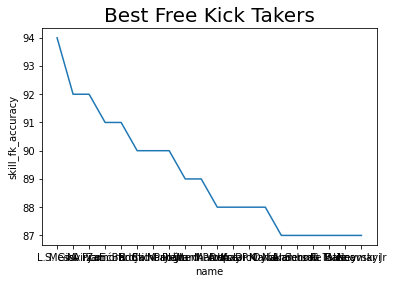

In [52]:
sns.lineplot(free_kick['name'], free_kick['skill_fk_accuracy']).set_title("Best Free Kick Takers", fontsize=20)

In [53]:
skill_moves.head()

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
256,Gelson Martins,24,173,74,Portugal,AS Monaco,82,86,29000000,47000,Right,3,3,5,2,57300000.0,RM,95.0,61.0,80,70,51,76,74,87,82,60,55,81,95,95,95,81,92,72,65,86,48,69,60,43,79,78,66,82,54,46,36,12,9,7,6,9,77.0,77.0,77.0,84.0,82.0,82.0,82.0,84.0,82.0,82.0,82.0,83.0,75.0,75.0,75.0,83.0,71.0,64.0,64.0,64.0,71.0,67.0,56.0,56.0,56.0,67.0
568,Vinícius Jr.,18,176,73,Brazil,Real Madrid,79,92,22500000,60000,Right,2,4,5,2,60200000.0,RW,93.0,63.0,71,68,50,73,70,86,77,62,67,82,92,94,93,77,83,74,75,79,60,68,48,26,76,73,65,77,32,25,18,5,7,7,7,10,75.0,75.0,75.0,81.0,79.0,79.0,79.0,81.0,79.0,79.0,79.0,80.0,72.0,72.0,72.0,80.0,60.0,55.0,55.0,55.0,60.0,55.0,45.0,45.0,45.0,55.0
154,R. Mahrez,28,179,67,Algeria,Manchester City,84,84,31500000,195000,Left,3,4,5,1,58300000.0,SUB,84.0,59.0,81,77,48,78,76,90,84,78,75,90,87,82,92,77,87,79,60,76,54,80,48,39,79,81,70,84,45,31,22,15,9,13,11,6,79.0,79.0,79.0,86.0,84.0,84.0,84.0,86.0,85.0,85.0,85.0,85.0,79.0,79.0,79.0,85.0,66.0,62.0,62.0,62.0,66.0,61.0,50.0,50.0,50.0,61.0
1931,M. Fernández,33,178,72,Chile,Junior FC,75,75,3900000,5000,Right,2,4,5,1,5500000.0,RES,70.0,62.0,75,61,50,78,70,78,80,82,76,80,72,69,76,71,74,78,69,63,65,75,50,60,70,78,72,76,58,60,56,11,8,5,10,11,71.0,71.0,71.0,75.0,75.0,75.0,75.0,75.0,77.0,77.0,77.0,76.0,75.0,75.0,75.0,76.0,69.0,69.0,69.0,69.0,69.0,67.0,62.0,62.0,62.0,67.0
369,Quaresma,35,175,67,Portugal,Beşiktaş JK,81,81,8000000,59000,Right,3,4,5,2,15200000.0,RM,77.0,63.0,91,67,41,79,80,87,94,71,75,86,77,77,86,75,84,79,63,62,59,79,74,24,78,84,73,82,29,17,11,12,14,10,5,15,75.0,75.0,75.0,84.0,81.0,81.0,81.0,84.0,83.0,83.0,83.0,83.0,76.0,76.0,76.0,83.0,59.0,57.0,57.0,57.0,59.0,53.0,43.0,43.0,43.0,53.0


Text(0.5, 1.0, 'Best Skill Moves')

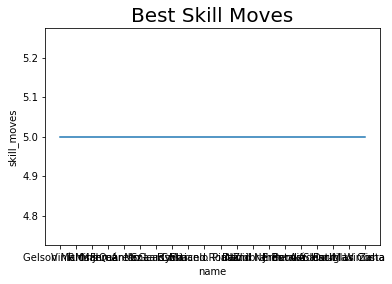

In [54]:
sns.lineplot(skill_moves['name'], skill_moves['skill_moves']).set_title("Best Skill Moves", fontsize=20)

In [55]:
finishing.head()

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,1,195800000.0,RW,87.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,2,96500000.0,LW,90.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
12,H. Kane,25,188,89,England,Tottenham Hotspur,89,91,83000000,220000,Right,3,4,3,2,159800000.0,ST,70.0,83.0,75,94,86,81,85,80,78,68,83,84,68,72,71,91,73,90,79,87,84,86,78,35,93,81,90,91,56,36,38,8,10,11,14,11,89.0,89.0,89.0,85.0,87.0,87.0,87.0,85.0,86.0,86.0,86.0,85.0,82.0,82.0,82.0,85.0,68.0,69.0,69.0,69.0,68.0,65.0,63.0,63.0,63.0,65.0
17,S. Agüero,31,173,70,Argentina,Manchester City,89,89,60000000,300000,Right,4,4,4,2,111000000.0,ST,80.0,74.0,70,93,78,83,85,88,83,73,64,89,82,78,84,92,91,89,81,79,74,84,65,24,93,83,83,90,30,29,24,13,15,6,11,14,90.0,90.0,90.0,88.0,90.0,90.0,90.0,88.0,88.0,88.0,88.0,86.0,80.0,80.0,80.0,86.0,63.0,61.0,61.0,61.0,63.0,59.0,53.0,53.0,53.0,59.0
19,L. Suárez,32,182,86,Uruguay,FC Barcelona,89,89,53000000,355000,Right,5,4,3,2,108700000.0,ST,73.0,84.0,78,91,83,82,90,85,86,82,72,84,76,70,79,92,79,88,69,82,86,86,87,41,92,82,83,85,57,45,38,27,25,31,33,37,91.0,91.0,91.0,88.0,90.0,90.0,90.0,88.0,89.0,89.0,89.0,87.0,84.0,84.0,84.0,87.0,72.0,72.0,72.0,72.0,72.0,69.0,68.0,68.0,68.0,69.0


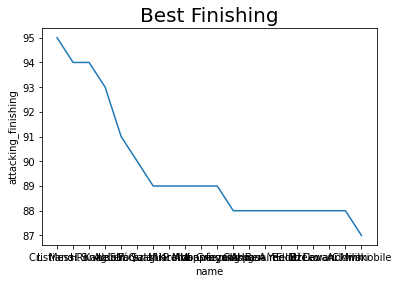

In [56]:
sns.lineplot(finishing['name'], finishing['attacking_finishing']).set_title("Best Finishing", fontsize=20);

* **Top speed player is K. Mbappé.**
* **Most number of accurate free kicks are by L. Messi.**
* **Almost players has the best skill moves.**
* **Best finisher of the game is L. Messi.**

### ** Count of players on basis of Positions in FIFA 20**

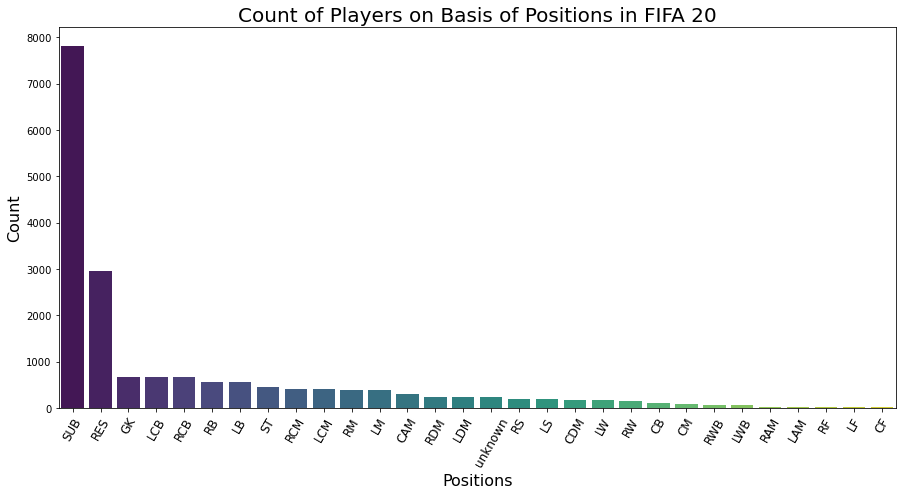

In [57]:
plt.figure(figsize= (15, 7))
ax = sns.countplot(x='position', data=data, palette='viridis', order=data.position.value_counts().index)
ax.set_title(label='Count of Players on Basis of Positions in FIFA 20', fontsize=20)
ax.set_xlabel(xlabel='Positions', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=60, fontsize=12)
plt.show()

In [58]:
ATTACKING = ["CF","LF","RF","RS","RW","LW","LS","ST"]
DEFENDING = ["CB","LB","LCB","LWB","RB","RCB","RWB"]
MIDFIELD = ["CAM","CDM","CM","LAM","LCM","LDM","LM","RAM","RCM","RDM","RM"]
GOALKEEPER = ["GK"]

In [59]:
main = []

for i in data["position"]:
    if i in ATTACKING:
        main.append("Attacking")
    elif i in DEFENDING:
        main.append("Defending")
    elif i in MIDFIELD:
        main.append("Midfield")
    elif i in GOALKEEPER:
        main.append("Goalkeeper")
    else:
        main.append(np.nan)
data["main_position"] = main

In [60]:
data.head(5)

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,main_position
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,1,195800000.0,RW,87.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0,Attacking
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,2,96500000.0,LW,90.000000,78.000000,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,Attacking
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,2,195200000.0,CAM,91.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,87.0,87.0,87.0,93.0,92.0,92.0,92.0,93.0,93.0,93.0,93.0,92.0,85.0,85.0,85.0,92.0,69.0,64.0,64.0,64.0,69.0,64.0,49.0,49.0,49.0,64.0,Midfield
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,1,164700000.0,GK,67.700899,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goalkeeper
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,2,184500000.0,LW,91.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,86.0,86.0,86.0,92.0,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0,Attacking


### ** Top players in attacking position**

In [61]:
data_top_attackers = data[data['position'].str.contains('ST|RW|LW|CF|LS|RS')==True].sort_values(by="overall", ascending=False)
data_top_attackers.head(10)

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,main_position
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,1,195800000.0,RW,87.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0,Attacking
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,2,96500000.0,LW,90.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,Attacking
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,2,184500000.0,LW,91.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,86.0,86.0,86.0,92.0,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0,Attacking
9,M. Salah,27,175,71,Egypt,Liverpool,90,90,80500000,240000,Left,3,3,4,2,148900000.0,RW,93.0,74.0,79,90,59,84,79,89,83,69,75,89,94,92,91,92,88,80,69,85,73,84,63,55,92,84,77,91,38,43,41,14,14,9,11,14,87.0,87.0,87.0,91.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,90.0,84.0,84.0,84.0,90.0,73.0,70.0,70.0,70.0,73.0,69.0,60.0,60.0,60.0,69.0,Attacking
10,K. Mbappé,20,178,73,France,Paris Saint-Germain,89,95,93500000,155000,Right,3,4,5,2,191700000.0,RW,96.0,75.0,78,89,77,82,79,91,79,63,70,90,96,96,92,89,83,83,76,84,76,79,62,38,89,80,70,84,34,34,32,13,5,7,11,6,89.0,89.0,89.0,90.0,90.0,90.0,90.0,90.0,89.0,89.0,89.0,89.0,81.0,81.0,81.0,89.0,69.0,65.0,65.0,65.0,69.0,66.0,57.0,57.0,57.0,66.0,Attacking
12,H. Kane,25,188,89,England,Tottenham Hotspur,89,91,83000000,220000,Right,3,4,3,2,159800000.0,ST,70.0,83.0,75,94,86,81,85,80,78,68,83,84,68,72,71,91,73,90,79,87,84,86,78,35,93,81,90,91,56,36,38,8,10,11,14,11,89.0,89.0,89.0,85.0,87.0,87.0,87.0,85.0,86.0,86.0,86.0,85.0,82.0,82.0,82.0,85.0,68.0,69.0,69.0,69.0,68.0,65.0,63.0,63.0,63.0,65.0,Attacking
17,S. Agüero,31,173,70,Argentina,Manchester City,89,89,60000000,300000,Right,4,4,4,2,111000000.0,ST,80.0,74.0,70,93,78,83,85,88,83,73,64,89,82,78,84,92,91,89,81,79,74,84,65,24,93,83,83,90,30,29,24,13,15,6,11,14,90.0,90.0,90.0,88.0,90.0,90.0,90.0,88.0,88.0,88.0,88.0,86.0,80.0,80.0,80.0,86.0,63.0,61.0,61.0,61.0,63.0,59.0,53.0,53.0,53.0,59.0,Attacking
19,L. Suárez,32,182,86,Uruguay,FC Barcelona,89,89,53000000,355000,Right,5,4,3,2,108700000.0,ST,73.0,84.0,78,91,83,82,90,85,86,82,72,84,76,70,79,92,79,88,69,82,86,86,87,41,92,82,83,85,57,45,38,27,25,31,33,37,91.0,91.0,91.0,88.0,90.0,90.0,90.0,88.0,89.0,89.0,89.0,87.0,84.0,84.0,84.0,87.0,72.0,72.0,72.0,72.0,72.0,69.0,68.0,68.0,68.0,69.0,Attacking
20,R. Lewandowski,30,184,80,Poland,FC Bayern München,89,89,64500000,235000,Right,4,4,4,2,106400000.0,ST,77.0,82.0,62,88,85,82,88,85,77,85,65,88,77,77,78,90,82,87,84,78,84,84,81,39,91,77,86,86,34,42,19,15,6,12,8,10,89.0,89.0,89.0,85.0,88.0,88.0,88.0,85.0,86.0,86.0,86

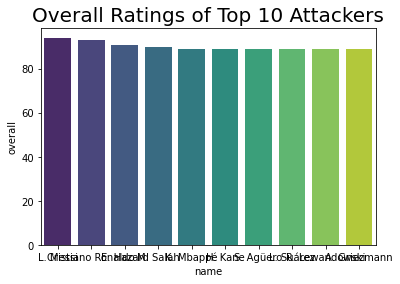

In [62]:
sns.barplot(data_top_attackers['name'].head(10), data_top_attackers['overall'].head(10), palette="viridis").set_title("Overall Ratings of Top 10 Attackers", fontsize=20);

### ** Top players in defending position**

In [63]:
data_top_defenders = data[data['position'].str.contains('CB|LB|LCB|LWB|RB|RCB|RWB')==True].sort_values(by="overall", ascending=False)
data_top_defenders.head(10)

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,main_position
7,V. van Dijk,27,193,92,Netherlands,Liverpool,90,91,78000000,200000,Right,3,3,2,1,150200000.0,LCB,77.0,86.0,53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,13,10,13,11,11,72.0,72.0,72.0,70.0,72.0,72.0,72.0,70.0,72.0,72.0,72.0,72.0,77.0,77.0,77.0,72.0,82.0,86.0,86.0,86.0,82.0,84.0,90.0,90.0,90.0,84.0,Defending
16,G. Chiellini,34,187,85,Italy,Juventus,89,89,24500000,215000,Left,4,3,2,1,40400000.0,LCB,68.0,82.0,54,33,83,65,45,59,60,31,65,61,61,73,57,82,57,78,89,59,89,49,91,88,28,50,50,84,94,91,89,3,3,2,4,3,61.0,61.0,61.0,58.0,59.0,59.0,59.0,58.0,59.0,59.0,59.0,60.0,65.0,65.0,65.0,60.0,76.0,80.0,80.0,80.0,76.0,79.0,89.0,89.0,89.0,79.0,Defending
18,Sergio Ramos,33,184,82,Spain,Real Madrid,89,89,31500000,300000,Right,4,3,3,2,64600000.0,LCB,72.0,85.0,66,63,92,80,69,65,74,72,83,83,74,71,78,87,66,79,93,80,85,62,90,88,67,71,86,84,85,87,90,11,8,9,7,11,77.0,77.0,77.0,75.0,76.0,76.0,76.0,75.0,77.0,77.0,77.0,76.0,81.0,81.0,81.0,76.0,83.0,87.0,87.0,87.0,83.0,85.0,90.0,90.0,90.0,85.0,Defending
11,K. Koulibaly,28,187,89,Senegal,Napoli,89,91,67500000,150000,Right,3,3,2,1,119800000.0,LCB,71.0,87.0,30,22,83,71,14,69,28,28,63,71,69,73,52,86,41,55,81,73,95,15,87,88,35,52,33,82,91,90,87,7,11,7,13,5,59.0,59.0,59.0,58.0,60.0,60.0,60.0,58.0,61.0,61.0,61.0,63.0,68.0,68.0,68.0,63.0,77.0,82.0,82.0,82.0,77.0,80.0,89.0,89.0,89.0,80.0,Defending
29,Piqué,32,194,85,Spain,FC Barcelona,88,88,38000000,285000,Right,4,3,2,2,77900000.0,RCB,56.0,80.0,57,65,85,83,57,63,58,43,81,82,48,63,57,85,36,62,75,70,87,51,76,89,64,72,69,87,89,88,87,10,11,14,15,8,73.0,73.0,73.0,70.0,72.0,72.0,72.0,70.0,74.0,74.0,74.0,72.0,79.0,79.0,79.0,72.0,80.0,86.0,86.0,86.0,80.0,81.0,88.0,88.0,88.0,81.0,Defending
35,D. Godín,33,187,78,Uruguay,Inter,88,88,28000000,135000,Right,3,3,2,1,47600000.0,RCB,60.0,83.0,52,42,88,79,47,53,49,49,70,74,61,60,57,81,53,67,90,65,89,43,88,87,48,52,50,82,90,89,87,6,8,15,5,15,65.0,65.0,65.0,62.0,63.0,63.0,63.0,62.0,64.0,64.0,64.0,64.0,70.0,70.0,70.0,64.0,77.0,83.0,83.0,83.0,77.0,80.0,89.0,89.0,89.0,80.0,Defending
49,M. Hummels,30,191,94,Germany,Borussia Dortmund,87,87,41000000,130000,Right,4,3,3,2,67700000.0,LCB,51.0,76.0,64,55,87,81,60,68,65,53,85,81,46,55,64,87,59,71,68,65,85,51,71,89,56,79,68,89,90,89,86,15,6,10,5,6,71.0,71.0,71.0,70.0,71.0,71.0,71.0,70.0,74.0,74.0,74.0,72.0,80.0,80.0,80.0,72.0,80.0,86.0,86.0,86.0,80.0,81.0,87.0,87.0,87.0,81.0,Defending
51,Jordi Alba,30,170,68,Spain,FC Barcelona,87,87,40000000,240000,Left,3,3,3,2,82000000.0,LB,90.0,73.0,87,73,70,84,60,81,80,63,79,85,91,90,89,85,85,64,81,92,61,66,77,83,83,78,59,82,74,83,84,13,15,13,6,13,79.0,79.0,79.0,85.0,83.0,83.0,83.0,85.0,84.0,84.0,84.0,86.0,84.0,84.0,84.0,86.0,87.0,84.0,84.0,84.0,87.0,87.0,81.0,81.0,81.0,87.0,Defending
50,T. Alderweireld,30,186,81,Belgium,Tottenham Hotspur,87,87,41000000,155000,Right,3,3,2,1,75900000.0,RCB,64.0,79.0,64,45,82,79,38,62,63,69,85,75,61,66,59,87,50,78,84,78,79,58,81,88,54,62,58,86,90,90,86,16,6,14,16,14,69.0,69.0,69.0,67.0,69.0,69.0,69.0,67.0,70.0,70.0,70.0,70.0,77.0,77.0,77.0,7

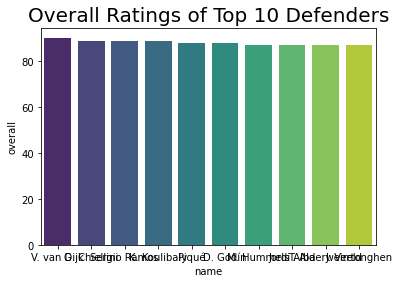

In [64]:
sns.barplot(data_top_defenders['name'].head(10), data_top_defenders['overall'].head(10), palette="viridis").set_title("Overall Ratings of Top 10 Defenders", fontsize=20);

### ** Top players in Mid-field position**

In [65]:
data_top_Midfielders = data[data['position'].str.contains('CAM|CDM|CM|LAM|LCM|LDM|LM|RAM|RCM|RDM|RM')==True].sort_values(by="overall", ascending=False)
data_top_Midfielders.head(10)

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,main_position
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,2,195200000.0,CAM,91.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,87.0,87.0,87.0,93.0,92.0,92.0,92.0,93.0,93.0,93.0,93.0,92.0,85.0,85.0,85.0,92.0,69.0,64.0,64.0,64.0,69.0,64.0,49.0,49.0,49.0,64.0,Midfield
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,Right,4,5,4,2,166500000.0,RCM,76.0,78.0,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0,Midfield
8,L. Modrić,33,172,66,Croatia,Real Madrid,90,90,45000000,340000,Right,4,4,4,2,92300000.0,RCM,74.0,66.0,86,72,55,92,76,87,85,78,88,92,77,71,92,89,93,79,68,85,58,82,62,82,79,91,82,92,68,76,71,13,9,7,14,9,80.0,80.0,80.0,87.0,86.0,86.0,86.0,87.0,89.0,89.0,89.0,88.0,90.0,90.0,90.0,88.0,84.0,84.0,84.0,84.0,84.0,82.0,75.0,75.0,75.0,82.0,Midfield
15,N. Kanté,28,168,72,France,Chelsea,89,90,66000000,235000,Right,3,3,2,1,130400000.0,RCM,78.0,83.0,68,65,54,86,56,79,49,49,81,80,79,77,82,93,92,71,77,97,73,63,90,92,72,79,54,85,90,91,85,15,12,10,7,10,75.0,75.0,75.0,80.0,79.0,79.0,79.0,80.0,81.0,81.0,81.0,82.0,85.0,85.0,85.0,82.0,88.0,90.0,90.0,90.0,88.0,87.0,86.0,86.0,86.0,87.0,Midfield
21,Sergio Busquets,30,189,76,Spain,FC Barcelona,89,89,55000000,300000,Right,4,3,3,1,112800000.0,CDM,42.0,80.0,62,67,68,89,44,80,66,68,82,88,40,43,67,87,49,61,66,86,77,54,85,89,77,86,60,93,90,86,80,5,8,13,9,13,73.0,73.0,73.0,76.0,78.0,78.0,78.0,76.0,81.0,81.0,81.0,78.0,86.0,86.0,86.0,78.0,81.0,89.0,89.0,89.0,81.0,81.0,85.0,85.0,85.0,81.0,Midfield
37,M. Reus,30,180,71,Germany,Borussia Dortmund,88,88,56000000,170000,Right,4,4,4,2,92400000.0,CAM,85.0,66.0,82,87,49,86,90,87,89,86,77,88,85,85,86,87,84,88,71,76,67,87,51,48,89,86,90,85,49,37,45,12,12,13,13,11,85.0,85.0,85.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,83.0,83.0,83.0,88.0,72.0,68.0,68.0,68.0,72.0,67.0,58.0,58.0,58.0,67.0,Midfield
38,P. Aubameyang,30,187,80,Gabon,Arsenal,88,88,57000000,205000,Right,3,4,4,1,108300000.0,LM,94.0,69.0,76,89,78,77,86,79,80,74,64,82,93,95,76,87,69,82,79,78,74,79,43,48,90,77,76,85,27,25,36,6,9,15,9,9,87.0,87.0,87.0,86.0,86.0,86.0,86.0,86.0,84.0,84.0,84.0,84.0,77.0,77.0,77.0,84.0,67.0,61.0,61.0,61.0,67.0,64.0,54.0,54.0,54.0,64.0,Midfield
36,T. Kroos,29,183,76,Germany,Real Madrid,88,88,57000000,330000,Right,4,5,3,1,116900000.0,LCM,45.0,69.0,88,75,58,91,82,80,86,84,92,89,50,41,60,87,71,87,30,74,73,86,60,76,75,89,73,88,72,70,62,10,11,13,7,10,78.0,78.0,78.0,81.0,82.0,82.0,82.0,81.0,84.0,84.0,84.0,82.0,88.0,88.0,88.0,82.0,78.0,82.0,82.0,82.0,78.0,75.0,72.0,72.0,72.0,75.0,Midfield
33,David Silva,33,173,67,Spain,Manchester City,88,88,36000000,265000,Left,4,2,4,2,66600000.0,LCM,65.0,57.0,84,72,54,92,82,87,82,77,84,92,69,61,87,89,88,72,64,73,48,73,57,50,88,91,75,92,59,53,29,6,15,7,6,12,79.0,79.0,79.0,86.0,86.0,86.0,86.0,86.0,88.0,88.0,88.0,86.0,86.0,86.

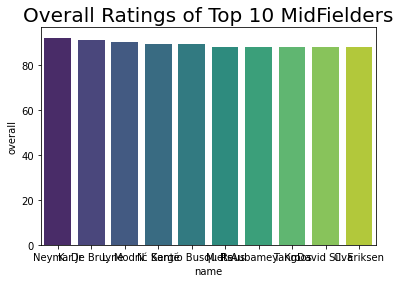

In [66]:
sns.barplot(data_top_Midfielders['name'].head(10), data_top_Midfielders['overall'].head(10), palette="viridis").set_title("Overall Ratings of Top 10 MidFielders", fontsize=20);

### ** Top players in Goal Keeping position**

In [67]:
data_top_Goalkeepers = data[data['position'].str.contains('GK')==True].sort_values(by="overall", ascending=False)
data_top_Goalkeepers.head(10)

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,main_position
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,1,164700000.0,GK,67.700899,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goalkeeper
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,Right,3,4,1,1,143400000.0,GK,67.700899,64.876678,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goalkeeper
13,Alisson,26,191,91,Brazil,Liverpool,89,91,58000000,155000,Right,3,3,1,1,111700000.0,GK,67.700899,64.876678,17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,85,84,85,90,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goalkeeper
14,De Gea,28,192,82,Spain,Manchester United,89,90,56000000,205000,Right,4,3,1,1,110600000.0,GK,67.700899,64.876678,17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13,90,84,81,85,92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goalkeeper
30,S. Handanovič,34,193,92,Slovenia,Inter,88,88,26000000,110000,Right,3,2,1,1,44200000.0,GK,67.700899,64.876678,12,10,10,36,12,12,12,14,34,16,51,55,47,83,36,52,78,41,71,19,25,22,12,41,23,69,25,10,13,88,85,69,89,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goalkeeper
31,M. Neuer,33,193,92,Germany,FC Bayern München,88,88,32000000,155000,Right,5,4,1,1,52800000.0,GK,67.700899,64.876678,15,13,25,55,11,30,14,11,59,46,54,60,51,84,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,87,87,91,85,87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goalkeeper
32,H. Lloris,32,188,82,France,Tottenham Hotspur,88,88,36000000,150000,Left,4,1,1,1,66600000.0,GK,67.700899,64.876678,13,10,10,50,11,10,11,10,50,34,65,62,55,86,54,51,74,41,43,14,31,27,10,30,40,65,29,10,18,89,82,68,84,91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goalkeeper
28,T. Courtois,27,199,96,Belgium,Real Madrid,88,89,48000000,235000,Left,4,2,1,1,102000000.0,GK,67.700899,64.876678,14,14,13,33,12,13,19,20,35,23,46,52,61,83,45,54,68,38,70,17,23,15,13,44,27,66,20,18,16,85,89,72,85,87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goalkeeper
25,Ederson,25,188,86,Brazil,Manchester City,88,91,54500000,185000,Left,2,3,1,1,104900000.0,GK,67.700899,64.876678,20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8,86,82,93,86,88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goalkeeper
60,W. Szczęsny,29,195,90,Poland,Juventus,86,88,37

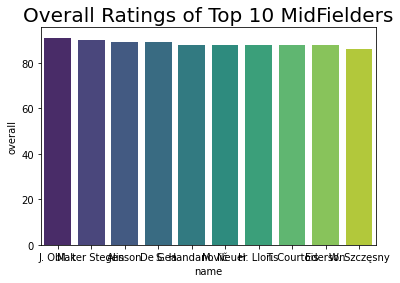

In [68]:
sns.barplot(data_top_Goalkeepers['name'].head(10), data_top_Goalkeepers['overall'].head(10), palette="viridis").set_title("Overall Ratings of Top 10 MidFielders", fontsize=20);

### ** Comparision between players**

In [69]:
column_r=['name','overall','potential','pace','attacking_crossing','attacking_short_passing','skill_dribbling','defending_marking','physic']
rival = data.head(20)[column_r]
rival = rival.set_index('name')
rival.head(20)

,overall,potential,pace,attacking_crossing,attacking_short_passing,skill_dribbling,defending_marking,physic
name,,,,,,,,
L. Messi,94,94,87.000000,88,92,97,33,66.000000
Cristiano Ronaldo,93,93,90.000000,84,83,89,28,78.000000
Neymar Jr,92,92,91.000000,87,87,96,27,58.000000
J. Oblak,91,93,67.700899,13,43,12,27,64.876678
E. Hazard,91,91,91.000000,81,89,95,34,66.000000
K. De Bruyne,91,91,76.000000,93,92,86,68,78.000000
M. ter Stegen,90,93,67.700899,18,61,21,25,64.876678
V. van Dijk,90,91,77.000000,53,78,70,91,86.000000
L. Modrić,90,90,74.000000,86,92,87,68,66.000000


In [70]:
def RadarChart(player1, data1, player2, data2):
    Attributes = ["overall","potential","Pace","attacking_crossing","attacking_short_passing","sill_dribbling","defending_marking","Physic"]
    angles1 = [n/8*2*pi for n in range(8)]
    angles1 += angles1[:1]
    angles2 = [n/8*2*pi for n in range(8)]
    angles2 += angles2[:1]
    plt.figure(dpi=125)
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles1[:-1], Attributes)
    ax.plot(angles1, data1)
    ax.fill(angles1, data1, 'teal', alpha=0.1)
    ax.plot(angles2, data2)
    ax.fill(angles2, data2, 'red',  alpha=0.1)
    plt.figtext(0.10,                 0.98, player1, color="steelblue")
    plt.figtext(len(player1)/35,      0.98, "vs")
    plt.figtext(len(player1)/35+0.05, 0.98,  player2, color="darkorange")
    plt.show()

In [71]:
def compare_two_players(player_id1, player_id2):
    values1 = rival.iloc[player_id1].tolist()
    values1 += values1[:1]
    values2 = rival.iloc[player_id2].tolist()
    values2 += values2[:1]
    RadarChart(data.head(20)['name'][player_id1], values1,
               data.head(20)['name'][player_id2], values2)

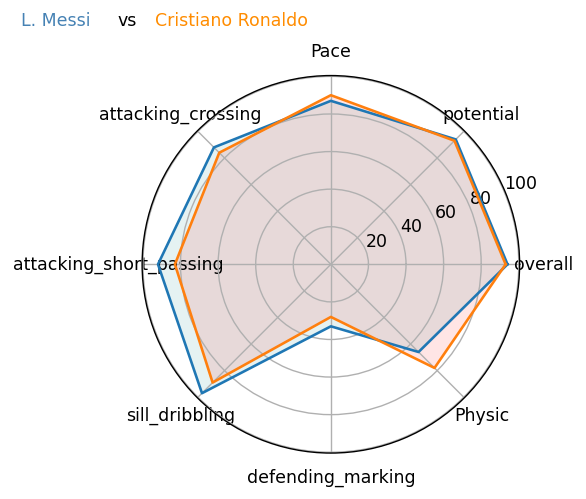

In [72]:
compare_two_players(0,1)

### *Insights: Out of 8 attributes - Messi performed well in 5 and Ronaldo in 4.*

### ** comparision between few more players**

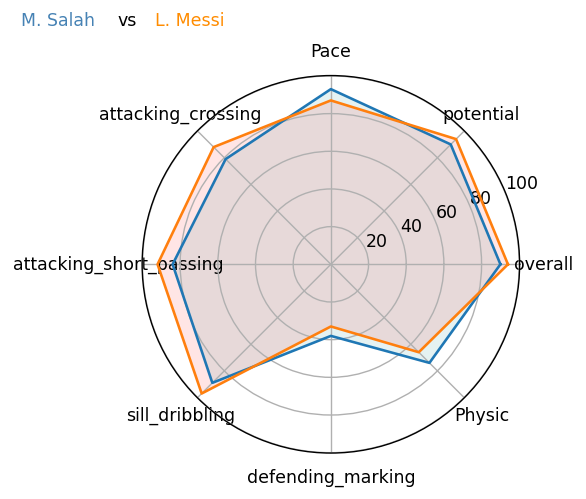

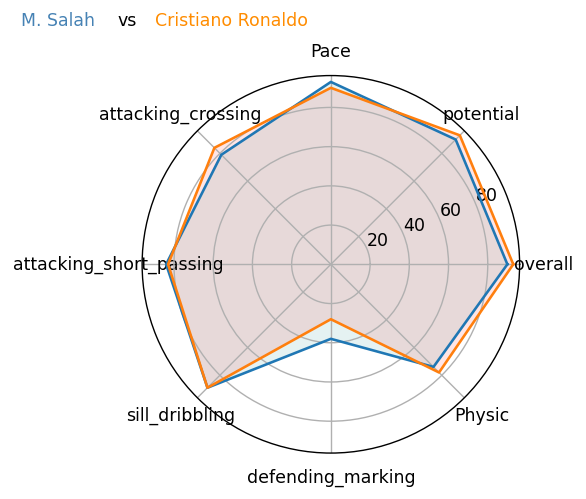

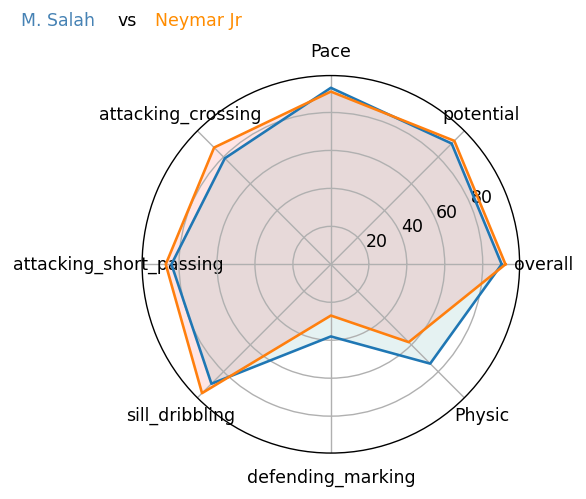

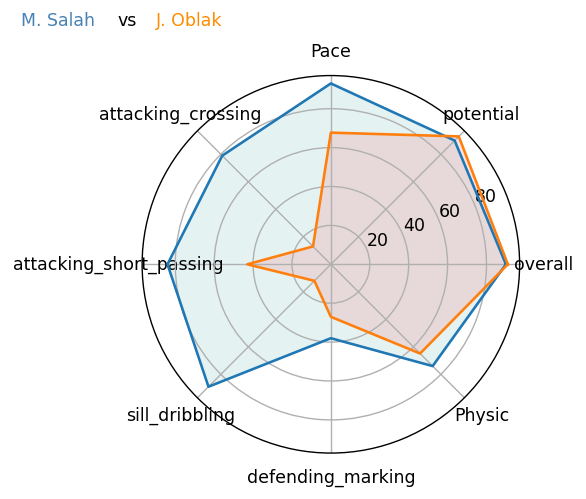

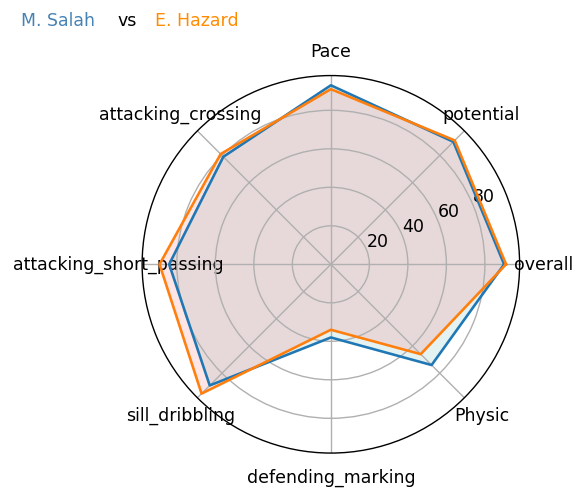

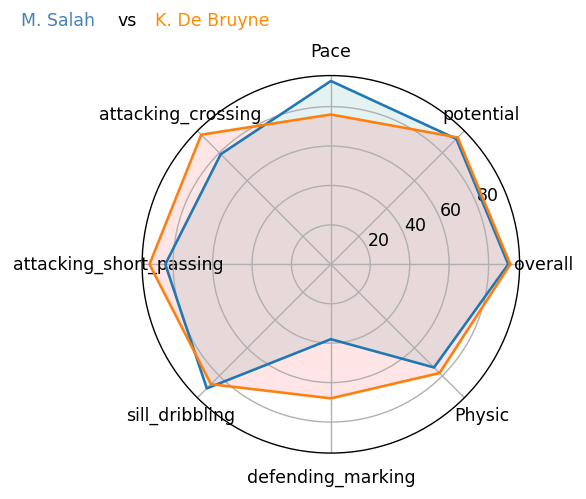

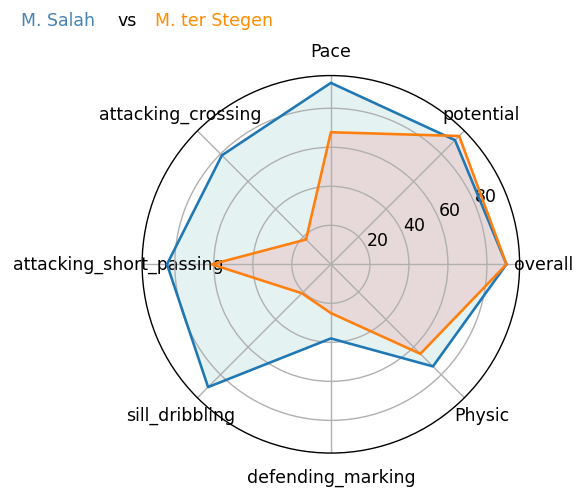

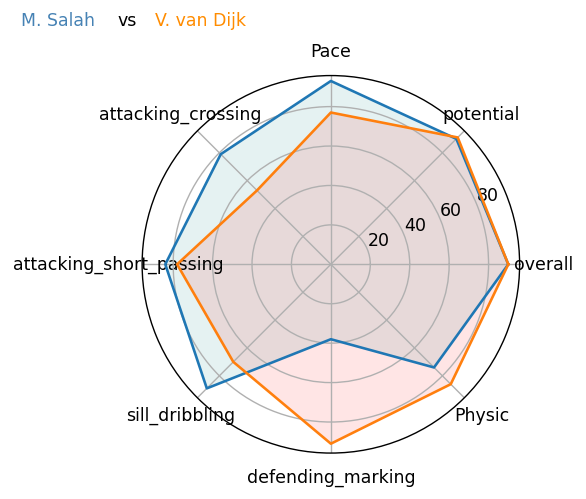

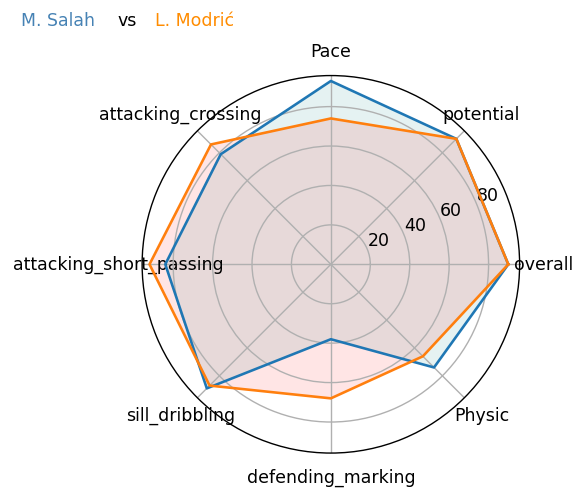

In [73]:
for i in range(9):
    compare_two_players(9, i)

### ** Insights from Bivariate Analysis:-
* **England has the most number of players playing in FIFA 20.**
* **L.Messi, Cristiano Ronaldo, Neymar Jr are the three Top rated players in FIFA 20.**
* **Top players are from the clubs FC Barcelona, Juventus, Paris Saint-Germain, Atlético Madrid, Real Madrid, Manchester City,      Liverpool.**
* **Most of the players preferred foot is Right.**
* **Most number of players has International Reputation 3 in Top 100 players.**
* **Highest number of players are between age 20 and 30.**
* **Countries with most of the players in Top 20 are Argentina, Brazil, Belgium, France, Spain.**
* **Top 20 players are from the clubs FC Barcelona. Liverpool, Paris Saint-Germain, Manchester city.**
* **Most valued players are Neymar Jr, L. Messi, K. Mbappe, K. De Bruyne, E.Hazard.**
* **Most of the players playing positions are LW and ST.**
* **Top players playing in attacking positions are L.Messi, Cristiano Ronaldo, E.Hazard, M. Salah, K. Mbappé.**
* **Top players playing in Defending position are V. van Dijk, G. Chiellini, Sergio Ramos, K.Koulibaly, Piqué.**
* **Top players playing in MidField positions are Neymar Jr, K. De Bruyne, L. Modrić, N. Kanté, Sergio Busquets.**
* **Top players playing in Goal Keeping position are J. Oblak, M. ter Stegen, Alisson, De Gea,S. Handanovič.**

### ** Analysing of overall ratings of players**

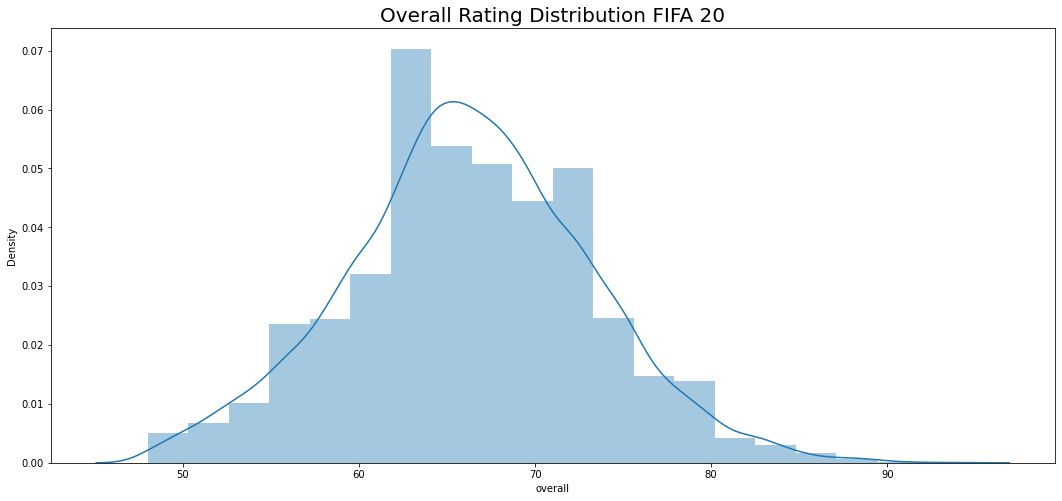

In [74]:
plt.figure(figsize=(18,8))
plt.title('Overall Rating Distribution FIFA 20', fontsize=20)
sns.distplot(a=data['overall'], kde=True, bins=20);


### *Here we see an almost normal distribution of player age with their Overall ratings.*

### *Since, overall decides the overall quality of a player, we will consider the players whose overall is greater than 86 and  remove the remaining players. This is just a soft criterion and a generally decent score on FIFA.*

In [75]:
data = data[data.overall > 86] # extracting players with overall above 86
data

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,main_position
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,1,195800000.0,RW,87.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0,Attacking
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,2,96500000.0,LW,90.000000,78.000000,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,Attacking
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,2,195200000.0,CAM,91.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,87.0,87.0,87.0,93.0,92.0,92.0,92.0,93.0,93.0,93.0,93.0,92.0,85.0,85.0,85.0,92.0,69.0,64.0,64.0,64.0,69.0,64.0,49.0,49.0,49.0,64.0,Midfield
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,1,164700000.0,GK,67.700899,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goalkeeper
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,2,184500000.0,LW,91.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,86.0,86.0,86.0,92.0,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0,Attacking
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,Right,4,5,4,2,166500000.0,RCM,76.000000,78.000000,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0,Midfield
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,Right,3,4,1,1,143400000.0,GK,67.700899,64.876678,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goalkeeper
7,V. van Dijk,27,193,92,Netherlands,Liverpool,90,91,78000000,200000,Right,3,3,2,1,150200000.0,LCB,77.000000,86.000000,53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,13,10,13,11,11,72.0,72.0,72.0,70.0,72.0,72.0,72.0,70.0,72.0,72.0,72.0,72.0,77.0,77.0,77.0,72.0,82.0,86.0,86.0,86.0,82.0,84.0,90.0,90.0,90.0,84.0,Defending
8,L. Modrić,33,172,66,Croatia,Real Madrid,90,90,45000000,340000,Right,4,4,4,2,92300000.0,RCM,74.000000,66.000000,86,72,55,92,76,87,85,78,88,92,77,71,92,89,93,79,68,85,58,82,62,82,79,91,82,92,68,76,71,13,9,7,14,9,80.0,80.

## Extracting certain data for Model creating

### *Since we are interested to see the clusters the data forms, it would be interesting to take some samples from various playing positions, skills and see how they get transformed into our clusters.*

In [76]:
data = data[['name','age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves','pace','physic','attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [77]:
data.head()

,name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,5,4,4,87.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,5,90.000000,78.000000,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,5,5,5,91.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,3,3,1,67.700899,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,4,4,4,91.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [78]:
names = data.name.tolist() # saving names for later

data = data.drop(['name'], axis = 1) # drop the name column 

##  Normalise the data

In [79]:
from sklearn import preprocessing

X = data.values # numpy array
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_scaled)

## Using PCA to reduce total columns into 2

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 2D PCA for the plot
reduced= pd.DataFrame(pca.fit_transform(X_norm))

In [81]:
reduced.head()

,0,1
0,-1.366005,-1.172629
1,-1.145082,-0.826301
2,-1.208464,-1.340406
3,3.023164,-0.553762
4,-1.114727,-1.082362


## Model Creation

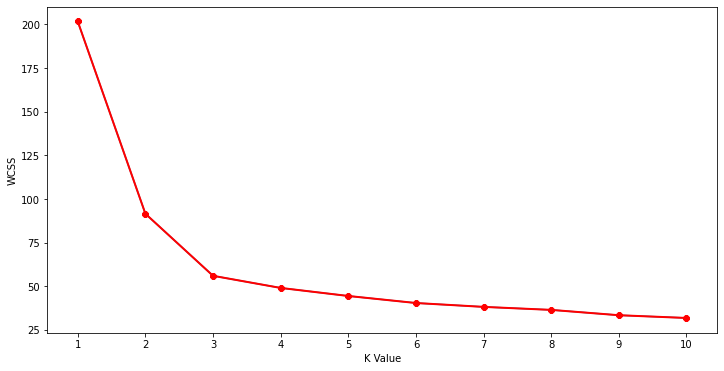

In [82]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X_norm)
    wcss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

### So we got 3 clusters

## Performing K-means clustering

In [83]:
from sklearn.cluster import KMeans

# specify the number of clusters
model = KMeans(n_clusters=3)

# fit the input data
model = model.fit(reduced)

# get the cluster labels
labels = model.predict(reduced)

# centroid values
centroid = model.cluster_centers_

# cluster values
clusters = model.labels_.tolist()

### Making a new data frame by adding players' names and their cluster

In [84]:
reduced['clusters'] = clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-1.366005,-1.172629,0,L. Messi
1,-1.145082,-0.826301,0,Cristiano Ronaldo
2,-1.208464,-1.340406,0,Neymar Jr
3,3.023164,-0.553762,1,J. Oblak
4,-1.114727,-1.082362,0,E. Hazard


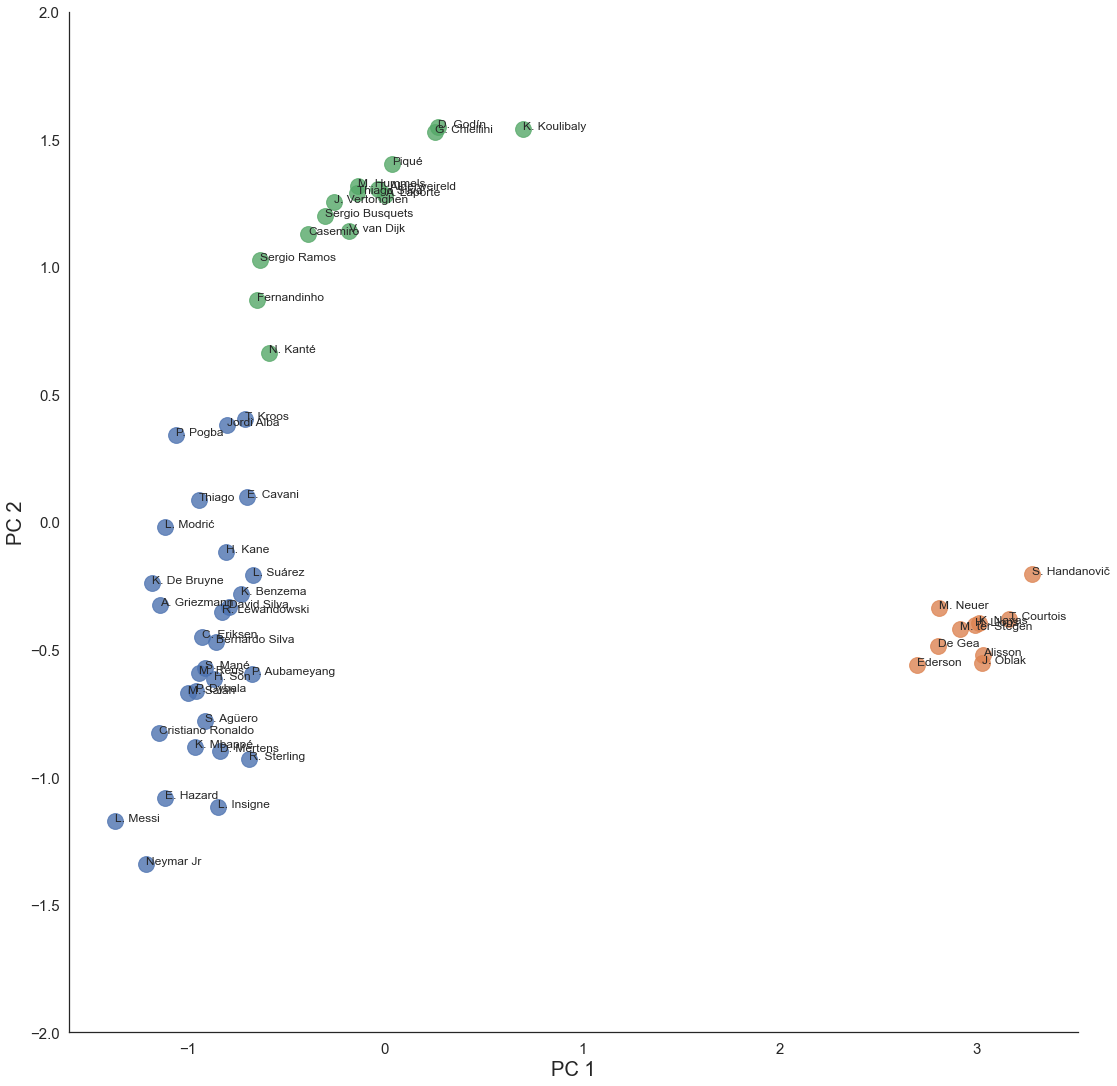

In [85]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, size = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

In [86]:
label=labels
label

from sklearn.metrics import silhouette_score
score=silhouette_score(X_norm,label)
score

0.4174235296345625

### Conclusion

*  This project presents a clustering method for football players based on their skills and attributes by using FIFA 20 dataset which is in the essence a video game but provides a realistic representation of football players.
*  By exploring the data, the most distinctive features for players are determined to use in the modelling. Standardization and feature extraction methods are applied on the dataset to prepare it for modelling. K-Means algorithm with 3 clusters is selected as the clustering model.